# Uporządkowany notebook zawierający preprocessing, funkcje oceniające modele oraz (na końcu) przekształcenia zbioru testowego

## Dostosowanie zbioru treningowego do testowego

In [698]:
#kolumny ze zbioru testowego
preds = strsplit(
  "LastCall__c	calculation_id	calculation_token	etx_make_name	etx_model_name	etx_fuel_code	production_year	etx_model_code	vehicle_id	protection_scope	kind	usage_type	use_frequency	child_carriage_frequency	mileage	yearly_mileage	used_abroad	night_parking_place	night_parking_place_postal_code	day_parking_place	day_parking_place_postal_code	theft_protection_installation	theft_protection_device_1	theft_protection_device_2	origin	buy_year	registration_date	is_damaged	leasing	car_worth	main_driver_postal_code	main_driver_age	main_driver_gender	insurance_start_date	phone_exists	calc_complete	calc_incomplete	calc_finished	phone_yes	phone_no	calculation_type	terms_acceptance	phone_acceptance	phone_accepted	step	created_at	created_at_date	affiliation_id	user_id	salesforce_lead	sent_to_sf	sf_r_purchasing	calculation_state	oc_offers_qty	oc_offer_min_val	ac_offers_qty	ac_offer_min_val	b2c_leads_sent	form_finished_at	offer_first_at	offer_last_at	offer_first_after	offer_last_after	phone_lookup_status	utm_campaign	utm_content	utm_medium	utm_source	pkb_transform_ver	went_to_partners	contact_requests	Acc_Agreement_call__c	Acc_Agreement_marketing__c	Acc_Agreement_newsletter__c	Acc_Birthdate__c	Acc_PhoneHLRStatus__c	Account__r.AccountSource	Account__r.AgreementCall__pc	Account__r.AgreementMarketing__pc	Account__r.AgreementNewsletter__pc	Account__r.BillingCity	Account__r.BillingPostalCode	Account__r.CreatedById	Account__r.CreatedDate	Account__r.Gender__pc	Account__r.Id	Account__r.IsDeleted	Account__r.IsPersonAccount	Account__r.LegacyID__c	Account__r.OwnerId	Account__r.PersonBirthdate	Account__r.PersonContactId	Account__r.PhoneHLRStatus__pc	Account__r.PhoneNATStatus__pc	Account__r.RecordTypeId	Account__r.Salutation	Account__r.Type	CalculationToken__c	CarEngineCapacity__c	CarFuelType__c	CarMake__c	CarModel__c	CarYear__c	CpcPaid__c	CreatedBy.Alias	CreatedBy.CreatedDate	CreatedById	CreatedDate	Id	IsDeleted	Mpc__c	PolicyStartDate__c	ProductScope__c	Source__c	WentToPartner__c	dont_have_this_car__c	TelehubStatus__c",
         "\t")[[1]]

In [699]:
preds

[1] "LastCall__c"                        "calculation_id"                    
  [3] "calculation_token"                  "etx_make_name"                     
  [5] "etx_model_name"                     "etx_fuel_code"                     
  [7] "production_year"                    "etx_model_code"                    
  [9] "vehicle_id"                         "protection_scope"                  
 [11] "kind"                               "usage_type"                        
 [13] "use_frequency"                      "child_carriage_frequency"          
 [15] "mileage"                            "yearly_mileage"                    
 [17] "used_abroad"                        "night_parking_place"               
 [19] "night_parking_place_postal_code"    "day_parking_place"                 
 [21] "day_parking_place_postal_code"      "theft_protection_installation"     
 [23] "theft_protection_device_1"          "theft_protection_device_2"         
 [25] "origin"                             "buy_year"                          
 [27] "registration_date"                  "is_damaged"                        
 [29] "leasing"                            "car_worth"                         
 [31] "main_driver_postal_code"            "main_driver_age"                   
 [33] "main_driver_gender"                 "insurance_start_date"              
 [35] "phone_exists"                       "calc_complete"                     
 [37] "calc_incomplete"                    "calc_finished"                     
 [39] "phone_yes"                          "phone_no"                          
 [41] "calculation_type"                   "terms_acceptance"                  
 [43] "phone_acceptance"                   "phone_accepted"                    
 [45] "step"                               "created_at"                        
 [47] "created_at_date"                    "affiliation_id"                    
 [49] "user_id"                            "salesforce_lead"                   
 [51] "sent_to_sf"                         "sf_r_purchasing"                   
 [53] "calculation_state"                  "oc_offers_qty"                     
 [55] "oc_offer_min_val"                   "ac_offers_qty"                     
 [57] "ac_offer_min_val"                   "b2c_leads_sent"                    
 [59] "form_finished_at"                   "offer_first_at"                    
 [61] "offer_last_at"                      "offer_first_after"                 
 [63] "offer_last_after"                   "phone_lookup_status"               
 [65] "utm_campaign"                       "utm_content"                       
 [67] "utm_medium"                         "utm_source"                        
 [69] "pkb_transform_ver"                  "went_to_partners"                  
 [71] "contact_requests"                   "Acc_Agreement_call__c"             
 [73] "Acc_Agreement_marketing__c"         "Acc_Agreement_newsletter__c"       
 [75] "Acc_Birthdate__c"                   "Acc_PhoneHLRStatus__c"             
 [77] "Account__r.AccountSource"           "Account__r.AgreementCall__pc"      
 [79] "Account__r.AgreementMarketing__pc"  "Account__r.AgreementNewsletter__pc"
 [81] "Account__r.BillingCity"             "Account__r.BillingPostalCode"      
 [83] "Account__r.CreatedById"             "Account__r.CreatedDate"            
 [85] "Account__r.Gender__pc"              "Account__r.Id"                     
 [87] "Account__r.IsDeleted"               "Account__r.IsPersonAccount"        
 [89] "Account__r.LegacyID__c"             "Account__r.OwnerId"                
 [91] "Account__r.PersonBirthdate"         "Account__r.PersonContactId"        
 [93] "Account__r.PhoneHLRStatus__pc"      "Account__r.PhoneNATStatus__pc"     
 [95] "Account__r.RecordTypeId"            "Account__r.Salutation"             
 [97] "Account__r.Type"                    "CalculationToken__c"               
 [99] "CarEngineCapacity__c"               "CarFuelType__c"                    
[1

In [700]:
length(preds)

[1] 117

In [701]:
load('ABH.rda')
df = ABH

In [702]:
colnames(ABH)

[1] "calculation_id"                          
  [2] "calculation_token"                       
  [3] "etx_make_name"                           
  [4] "etx_model_name"                          
  [5] "etx_fuel_code"                           
  [6] "production_year"                         
  [7] "etx_model_code"                          
  [8] "vehicle_id"                              
  [9] "protection_scope"                        
 [10] "kind"                                    
 [11] "usage_type"                              
 [12] "use_frequency"                           
 [13] "child_carriage_frequency"                
 [14] "mileage"                                 
 [15] "yearly_mileage"                          
 [16] "used_abroad"                             
 [17] "night_parking_place"                     
 [18] "night_parking_place_postal_code"         
 [19] "day_parking_place"                       
 [20] "day_parking_place_postal_code"           
 [21] "theft_protection_installation"           
 [22] "theft_protection_device_1"               
 [23] "theft_protection_device_2"               
 [24] "origin"                                  
 [25] "buy_year"                                
 [26] "registration_date"                       
 [27] "is_damaged"                              
 [28] "leasing"                                 
 [29] "car_worth"                               
 [30] "main_driver_postal_code"                 
 [31] "main_driver_age"                         
 [32] "main_driver_gender"                      
 [33] "insurance_start_date"                    
 [34] "phone_exists"                            
 [35] "calc_complete"                           
 [36] "calc_incomplete"                         
 [37] "calc_finished"                           
 [38] "phone_yes"                               
 [39] "phone_no"                                
 [40] "calculation_type"                        
 [41] "terms_acceptance"                        
 [42] "phone_acceptance"                        
 [43] "phone_accepted"                          
 [44] "step"                                    
 [45] "created_at"                              
 [46] "created_at_date"                         
 [47] "affiliation_id"                          
 [48] "user_id"                                 
 [49] "sent_to_sf"                              
 [50] "sf_r_purchasing"                         
 [51] "calculation_state"                       
 [52] "oc_offers_qty"                           
 [53] "oc_offer_min_val"                        
 [54] "ac_offers_qty"                           
 [55] "ac_offer_min_val"                        
 [56] "b2c_leads_sent"                          
 [57] "form_finished_at"                        
 [58] "offer_first_at"                          
 [59] "offer_last_at"                           
 [60] "offer_first_after"                       
 [61] "offer_last_after"                        
 [62] "phone_lookup_status"                     
 [63] "utm_campaign"                            
 [64] "utm_content"                             
 [65] "utm_medium"                              
 [66] "utm_source"                              
 [67] "pkb_transform_ver"                       
 [68] "went_to_partners"                        
 [69] "contact_requests"                        
 [70] "policy_started"                          
 [71] "policy_issued"                           
 [72] "collection"                              
 [73] "commision"                               
 [74] "imp_fullcalc_status"                     
 [75] "Acc_Agreement_call__c"                   
 [76] "Acc_Agreement_marketing__c"              
 [77] "Acc_Agreement_newsletter__c"             
 [78] "Acc_Birthdate__c"                        
 [79] "Acc_PhoneHLRStatus__c"                   
 [80] "Account_Last_Modified_At__c"             
 [81] "Account__r.AccountSource"                
 [82] "Account__r.AgreementCall__

In [703]:
ncol(df)

[1] 152

In [704]:
#wybieram tylko kolumny, ktore sa w zbiorze testowym

In [705]:
indices = sapply(preds, function(pred){which(colnames(df)==pred)})

In [706]:
length(indices)

[1] 117

In [707]:
labelindex = which(colnames(df)=='Sale.success')

In [708]:
#to jest etykieta wlasciwa - czy sprzedaz sie udala?
labelindex

[1] 148

In [709]:
unlist(indices)

LastCall__c                     calculation_id 
                               120                                  1 
                 calculation_token                      etx_make_name 
                                 2                                  3 
                    etx_model_name                      etx_fuel_code 
                                 4                                  5 
                   production_year                     etx_model_code 
                                 6                                  7 
                        vehicle_id                   protection_scope 
                                 8                                  9 
                              kind                         usage_type 
                                10                                 11 
                     use_frequency           child_carriage_frequency 
                                12                                 13 
                           mileage                     yearly_mileage 
                                14                                 15 
                       used_abroad                night_parking_place 
                                16                                 17 
   night_parking_place_postal_code                  day_parking_place 
                                18                                 19 
     day_parking_place_postal_code      theft_protection_installation 
                                20                                 21 
         theft_protection_device_1          theft_protection_device_2 
                                22                                 23 
                            origin                           buy_year 
                                24                                 25 
                 registration_date                         is_damaged 
                                26                                 27 
                           leasing                          car_worth 
                                28                                 29 
           main_driver_postal_code                    main_driver_age 
                                30                                 31 
                main_driver_gender               insurance_start_date 
                                32                                 33 
                      phone_exists                      calc_complete 
                                34                                 35 
                   calc_incomplete                      calc_finished 
                                36                                 37 
                         phone_yes                           phone_no 
                                38                                 39 
                  calculation_type                   terms_acceptance 
                                40                                 41 
                  phone_acceptance                     phone_accepted 
                                42                                 43 
                              step                         created_at 
                                44                                 45 
                   created_at_date                     affiliation_id 
                                46                                 47 
                           user_id                         sent_to_sf 
                                48                                 49 
                   sf_r_purchasing                  calculation_state 
                                50                                 51 
                     oc_offers_qty                   oc_offer_min_val 
                                52                                 53 
                     ac_offers_qty                   ac_offer_min_val 
                                54                                 55 
                    b2c_leads_sent             

In [710]:
#wlasciwa ramka danych - to co w testowym + etykieta
train = df[,c(unlist(indices),labelindex)]

In [711]:
ncol(train)

[1] 117

In [712]:
head(train)

,LastCall__c,calculation_id,calculation_token,etx_make_name,etx_model_name,etx_fuel_code,production_year,etx_model_code,vehicle_id,protection_scope,⋯,Id,IsDeleted,Mpc__c,PolicyStartDate__c,ProductScope__c,Source__c,WentToPartner__c,dont_have_this_car__c,TelehubStatus__c,Sale.success
1,NA,1847410,Fc5o2b,RENAULT,Megane,100001,1997,8191,7045,1,⋯,a00410000086mtqAAA,FALSE,NA,42811,OC,full_calc,FALSE,FALSE,NA,0
3,NA,1847453,dRXV5F,MAZDA,323,100001,1996,7884,34707,1,⋯,a00410000086mniAAA,FALSE,NA,42794,OC,full_calc,FALSE,FALSE,NA,0
4,NA,1847456,eRdBt1,AUDI,Q7,100003,2007,12113,60275,2,⋯,a00410000086lSqAAI,FALSE,NA,42795,OC+AC,full_calc,FALSE,FALSE,NA,0
5,NA,1847478,ZWLyxM,VOLKSWAGEN,Passat,100003,2001,10533,41583,1,⋯,a00410000086mwuAAA,FALSE,NA,42807,OC,full_calc,TRUE,FALSE,NA,0
6,NA,1847487,rCzLgy,PEUGEOT,406,100003,2000,9674,36042,1,⋯,a00410000086mzKAAQ,FALSE,NA,42803,OC,full_calc,FALSE,FALSE,NA,0
7,NA,1847494,A1_zH9,SKODA,Fabia,100001,2001,10269,44128,1,⋯,a00410000086mvDAAQ,FALSE,NA,42822,OC,full_calc,FALSE,FALSE,NA,1


## usuwanie identyfikatorów

In [713]:
colnames(train)[grepl(".*id.*", colnames(train), ignore.case = T)]

[1] "calculation_id"             "vehicle_id"                
 [3] "affiliation_id"             "user_id"                   
 [5] "Account__r.CreatedById"     "Account__r.Id"             
 [7] "Account__r.LegacyID__c"     "Account__r.OwnerId"        
 [9] "Account__r.PersonContactId" "Account__r.RecordTypeId"   
[11] "CpcPaid__c"                 "CreatedById"               
[13] "Id"

In [714]:
ids = which(grepl(".*id.*",colnames(train),ignore.case=T))

In [715]:
#identyfikatory, do usuniecia
ids

[1]   2   9  48  49  82  85  88  89  91  94 103 106 108

In [716]:
colnames(train)[ids]

[1] "calculation_id"             "vehicle_id"                
 [3] "affiliation_id"             "user_id"                   
 [5] "Account__r.CreatedById"     "Account__r.Id"             
 [7] "Account__r.LegacyID__c"     "Account__r.OwnerId"        
 [9] "Account__r.PersonContactId" "Account__r.RecordTypeId"   
[11] "CpcPaid__c"                 "CreatedById"               
[13] "Id"

In [717]:
#ta kolumna moze sie przydac
cpcpaid = which(colnames(train)=='CpcPaid__c')

In [718]:
cpcpaid

[1] 103

In [719]:
#token kalkulacji nie jest potrzebny
calctokenid = which(colnames(train)=='calculation_token')

In [720]:
ids = c(ids[ids!=cpcpaid],calctokenid)

In [721]:
ids

[1]   2   9  48  49  82  85  88  89  91  94 106 108   3

In [722]:
#te predyktory powyzej do usuniecia, zatem usuwam
train2 = train[,-ids]

In [723]:
ncol(train2)

[1] 104

## Zamiana character -> numeric

In [724]:
sapply(train2,class)

LastCall__c                      etx_make_name 
                         "numeric"                        "character" 
                    etx_model_name                      etx_fuel_code 
                       "character"                        "character" 
                   production_year                     etx_model_code 
                       "character"                        "character" 
                  protection_scope                               kind 
                       "character"                        "character" 
                        usage_type                      use_frequency 
                       "character"                        "character" 
          child_carriage_frequency                            mileage 
                       "character"                        "character" 
                    yearly_mileage                        used_abroad 
                       "character"                          "numeric" 
               night_parking_place    night_parking_place_postal_code 
                       "character"                        "character" 
                 day_parking_place      day_parking_place_postal_code 
                       "character"                        "character" 
     theft_protection_installation          theft_protection_device_1 
                       "character"                        "character" 
         theft_protection_device_2                             origin 
                       "character"                        "character" 
                          buy_year                  registration_date 
                       "character"                          "numeric" 
                        is_damaged                            leasing 
                       "character"                        "character" 
                         car_worth            main_driver_postal_code 
                       "character"                        "character" 
                   main_driver_age                 main_driver_gender 
                         "numeric"                        "character" 
              insurance_start_date                       phone_exists 
                         "numeric"                        "character" 
                     calc_complete                    calc_incomplete 
                         "numeric"                          "numeric" 
                     calc_finished                          phone_yes 
                         "numeric"                          "numeric" 
                          phone_no                   calculation_type 
                         "numeric"                        "character" 
                  terms_acceptance                   phone_acceptance 
                         "numeric"                          "numeric" 
                    phone_accepted                               step 
                         "numeric"                          "numeric" 
                        created_at                    created_at_date 
                         "numeric"                          "numeric" 
                        sent_to_sf                    sf_r_purchasing 
                         "numeric"                          "numeric" 
                 calculation_state                      oc_offers_qty 
                       "character"                          "numeric" 
                  oc_offer_min_val                      ac_offers_qty 
                         "numeric"                          "numeric" 
                  ac_offer_min_val                     b2c_leads_sent 
                         "numeric"                          "numeric" 
                  form_finished_at                     offer_first_at 
                         "numeric"                          "numeric" 
                     offer_last_at                  offer_first_after 
                         "numeric"                          "numeric" 
                  offer_last_after             

In [725]:
#te kolumny są numeryczne, a wczytane zostały jako character, zatem zamiana

In [726]:
train2$production_year = as.numeric(train2$production_year)
train2$mileage = as.numeric(train2$mileage)
train2$yearly_mileage = as.numeric(train2$yearly_mileage)
train2$buy_year = as.numeric(train2$buy_year)
train2$car_worth = as.numeric(train2$car_worth)


In [727]:
sapply(train2,class)

LastCall__c                      etx_make_name 
                         "numeric"                        "character" 
                    etx_model_name                      etx_fuel_code 
                       "character"                        "character" 
                   production_year                     etx_model_code 
                         "numeric"                        "character" 
                  protection_scope                               kind 
                       "character"                        "character" 
                        usage_type                      use_frequency 
                       "character"                        "character" 
          child_carriage_frequency                            mileage 
                       "character"                          "numeric" 
                    yearly_mileage                        used_abroad 
                         "numeric"                          "numeric" 
               night_parking_place    night_parking_place_postal_code 
                       "character"                        "character" 
                 day_parking_place      day_parking_place_postal_code 
                       "character"                        "character" 
     theft_protection_installation          theft_protection_device_1 
                       "character"                        "character" 
         theft_protection_device_2                             origin 
                       "character"                        "character" 
                          buy_year                  registration_date 
                         "numeric"                          "numeric" 
                        is_damaged                            leasing 
                       "character"                        "character" 
                         car_worth            main_driver_postal_code 
                         "numeric"                        "character" 
                   main_driver_age                 main_driver_gender 
                         "numeric"                        "character" 
              insurance_start_date                       phone_exists 
                         "numeric"                        "character" 
                     calc_complete                    calc_incomplete 
                         "numeric"                          "numeric" 
                     calc_finished                          phone_yes 
                         "numeric"                          "numeric" 
                          phone_no                   calculation_type 
                         "numeric"                        "character" 
                  terms_acceptance                   phone_acceptance 
                         "numeric"                          "numeric" 
                    phone_accepted                               step 
                         "numeric"                          "numeric" 
                        created_at                    created_at_date 
                         "numeric"                          "numeric" 
                        sent_to_sf                    sf_r_purchasing 
                         "numeric"                          "numeric" 
                 calculation_state                      oc_offers_qty 
                       "character"                          "numeric" 
                  oc_offer_min_val                      ac_offers_qty 
                         "numeric"                          "numeric" 
                  ac_offer_min_val                     b2c_leads_sent 
                         "numeric"                          "numeric" 
                  form_finished_at                     offer_first_at 
                         "numeric"                          "numeric" 
                     offer_last_at                  offer_first_after 
                         "numeric"                          "numeric" 
                  offer_last_after             

## Zamiana character -> factor, dodawanie poziomu NA

In [728]:
for (i in 1:length(train2)) {
  if (is.character(train2[,i])){
    train2[,i] = as.factor(train2[,i])
  }
  if (is.factor(train2[,i])){
      train2[,i] = addNA(train2[,i])
  }
}

## Usuwanie predyktorów z wariancją bliską zero (czyli takich co mają przeważnie jedną wartość lub jedna wartość jest drastycznie częsta)

In [729]:
if (!require("caret")){
    install.packages("caret")
}
library("caret")

In [730]:
nzv = nearZeroVar(train2,freqCut=99) #bardzo duży cutoff - 99/1 (by nie obcinać zbyt dużo)

In [731]:
colnames(train2)[nzv]

[1] "usage_type"                         "is_damaged"                        
 [3] "leasing"                            "calc_complete"                     
 [5] "calc_incomplete"                    "calc_finished"                     
 [7] "calculation_type"                   "terms_acceptance"                  
 [9] "sent_to_sf"                         "sf_r_purchasing"                   
[11] "calculation_state"                  "ac_offer_min_val"                  
[13] "pkb_transform_ver"                  "contact_requests"                  
[15] "Acc_Agreement_newsletter__c"        "Account__r.AgreementNewsletter__pc"
[17] "Account__r.IsDeleted"               "Account__r.IsPersonAccount"        
[19] "Account__r.Type"                    "CpcPaid__c"                        
[21] "CreatedBy.Alias"                    "CreatedBy.CreatedDate"             
[23] "IsDeleted"

In [732]:
train3 = train2[,-nzv]
#od razu mniej predyktorów:
ncol(train3)

[1] 81

## Imputacja numerycznych faktorów

In [733]:
numericpreds = which(sapply(train3,class)=='numeric')
yind = which(names(numericpreds)=='Sale.success')
numericpreds = numericpreds[-yind]
numericpreds

LastCall__c            production_year 
                         1                          5 
                   mileage             yearly_mileage 
                        11                         12 
               used_abroad                   buy_year 
                        13                         22 
         registration_date                  car_worth 
                        23                         24 
           main_driver_age       insurance_start_date 
                        26                         28 
                 phone_yes                   phone_no 
                        30                         31 
          phone_acceptance             phone_accepted 
                        32                         33 
                      step                 created_at 
                        34                         35 
           created_at_date              oc_offers_qty 
                        36                         37 
          oc_offer_min_val              ac_offers_qty 
                        38                         39 
            b2c_leads_sent           form_finished_at 
                        40                         41 
            offer_first_at              offer_last_at 
                        42                         43 
         offer_first_after           offer_last_after 
                        44                         45 
       phone_lookup_status           went_to_partners 
                        46                         51 
          Acc_Birthdate__c     Account__r.CreatedDate 
                        54                         61 
Account__r.PersonBirthdate       CarEngineCapacity__c 
                        63                         68 
                CarYear__c                CreatedDate 
                        72                         73 
        PolicyStartDate__c 
                        75

### Numeryczne atrybuty bez NA, poszukam takich:

In [734]:
has_NA = sapply(numericpreds,function(npred)any(is.na(train3[,npred])))

In [735]:
numericpreds = numericpreds[has_NA]
numericpreds
numericpreds_keep_to_test = numericpreds

LastCall__c                    mileage 
                         1                         11 
            yearly_mileage                   buy_year 
                        12                         22 
                 car_worth              oc_offers_qty 
                        24                         37 
             ac_offers_qty             b2c_leads_sent 
                        39                         40 
          form_finished_at             offer_first_at 
                        41                         42 
             offer_last_at           Acc_Birthdate__c 
                        43                         54 
Account__r.PersonBirthdate       CarEngineCapacity__c 
                        63                         68 
                CarYear__c         PolicyStartDate__c 
                        72                         75

Jest ich na tyle mało, że imputacja może być ręczna

In [736]:
#sprawdzam frakcję brakujących danych
sapply(train3[,numericpreds],function(x){mean(is.na(x))})

LastCall__c                    mileage 
              7.628943e-01               5.339256e-05 
            yearly_mileage                   buy_year 
              4.271405e-05               5.339256e-05 
                 car_worth              oc_offers_qty 
              3.583709e-02               1.847383e-03 
             ac_offers_qty             b2c_leads_sent 
              1.428571e-01               7.032868e-02 
          form_finished_at             offer_first_at 
              2.028917e-04               2.843368e-01 
             offer_last_at           Acc_Birthdate__c 
              2.843368e-01               4.922794e-01 
Account__r.PersonBirthdate       CarEngineCapacity__c 
              4.922794e-01               3.162975e-02 
                CarYear__c         PolicyStartDate__c 
              3.151229e-02               7.047818e-03

In [737]:
#kilka predyktorów ma dużo brakujących danych - trzeba będzie potem pomyśleć co z tym można zrobić

In [738]:
length(numericpreds)

[1] 16

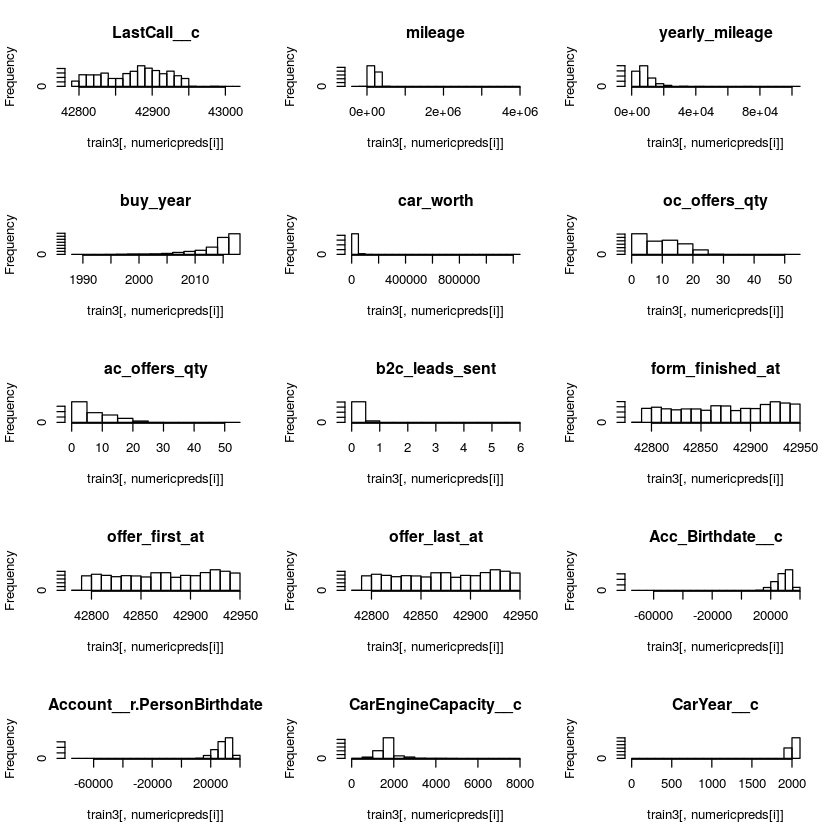

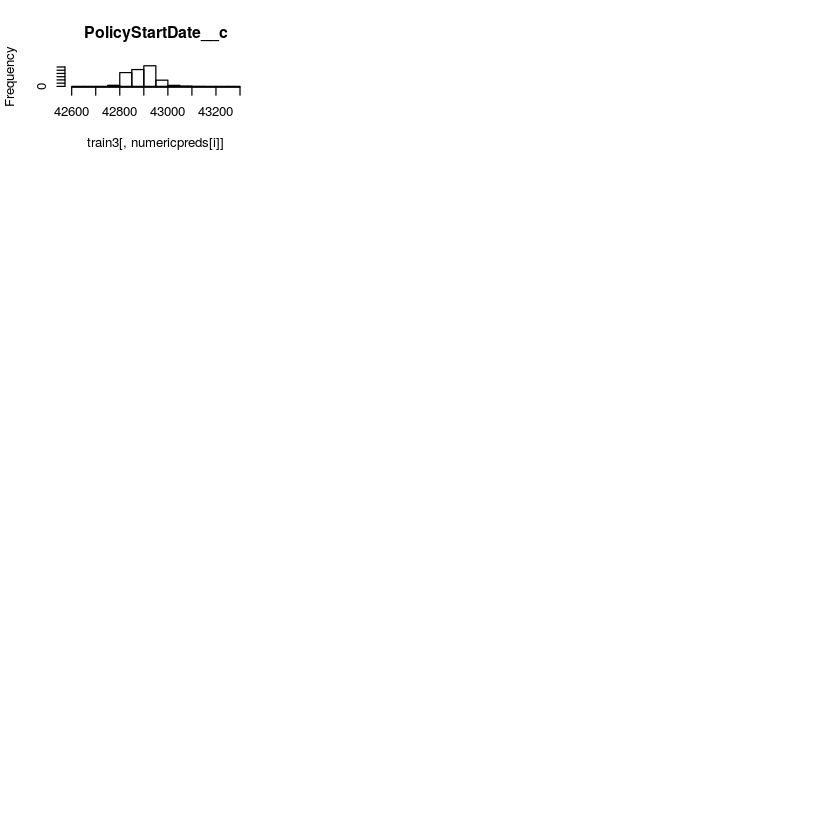

In [739]:
#rozkład wartości w predyktorach
par(mfrow=c(5,3))
for (i in 1:length(numericpreds)){
    hist(train3[,numericpreds[i]],main=colnames(train3)[numericpreds[i]])
}

Imputacja brakujących danych przez średnie (inne metody są niewykonalne w skończonym czasie)

In [740]:
for (numericpred in numericpreds){
    train3[which(is.na(train3[,numericpred])),numericpred] = as.integer(mean(na.omit(train3[,numericpred])))
}

In [741]:
#nie ma już żadnych brakujących wartości
any(sapply(train3,function(x)any(is.na(x))))

[1] FALSE

## Zamiana logical na numeric

In [742]:
(linds = which(sapply(train3,class)%in%c('logical')))

[1] 52 53 57 58 78 79

In [743]:
for (l in linds){
    train3[,l] = as.integer(train3[,l])
}

## Korelacje

In [744]:
#korelacja nie dziala dla factorow - sprawdzam zatem tylko dla ilosciowych
numerics = which(sapply(train3,class)%in%c('numeric','integer'))
cr = cor(train3[,numerics])

In [745]:
correlated = findCorrelation(cr,cutoff= 0.8,names=TRUE)

In [746]:
correlated

[1] "Account__r.CreatedDate"       "CreatedDate"                 
 [3] "created_at"                   "form_finished_at"            
 [5] "created_at_date"              "insurance_start_date"        
 [7] "offer_first_at"               "phone_yes"                   
 [9] "phone_no"                     "phone_acceptance"            
[11] "phone_accepted"               "Acc_Agreement_call__c"       
[13] "Acc_Agreement_marketing__c"   "Account__r.AgreementCall__pc"
[15] "oc_offers_qty"                "Acc_Birthdate__c"

In [747]:
traininds = sapply(correlated,function(cc)which(colnames(train3)==cc))

In [748]:
train4 = train3[,-traininds]

In [749]:
ncol(train4)

[1] 65

## Współliniowość

In [750]:
#podobnie jak wczesniej, znowu dla ilosciowych tylko
numerics = which(sapply(train4,class)%in%c('numeric','integer'))

In [751]:
numerics

[1]  1  5 11 12 13 22 23 24 26 29 30 31 32 33 34 35 36 41 44 48 53 57 59 62 63
[26] 65

In [752]:
combos = findLinearCombos(train4[,numerics])

In [753]:
combos

$linearCombos
list()

$remove
NULL


Korelacja usunęła współliniowości.

## Zamiana kodów pocztowych na rejon

### Funkcja

In [754]:
postalCodeToRegion = function (vector){
    vector = as.character(vector)
    codes = sapply(vector,function(v){
        if (is.na(v) | (substr(v,3,3) != '-') | (nchar(v) != 6)){
            NA
        } else {
            aa = substr(v,1,2)
            a = substr(aa,1,1)
            if (a == '0'){
                if (aa %in% c('00','01','02','03','04','05')){
                    'Warsaw'
                } else {
                    'Warsaw Region'
                }
            }else if (a == '1'){
                if (aa == '10'){
                    'Olsztyn'
                } else if (aa=='15'){
                    'Bialystok'
                } else {
                    'Olsztyn Region'
                }
            }else if (a == '2'){
                if (aa == '20'){
                    'Lublin'
                } else if (aa=='25'){
                    'Kielce'
                } else if (aa=='26'){
                    'Radom'
                } else {
                    'Lublin Region'
                }
            }else if (a == '3'){
                if (aa %in% c('30','31')){
                    'Krakow'
                } else if (aa=='35'){
                    'Rzeszow'
                } else {
                    'Krakow Region'
                }
            }else if (a == '4'){
                if (aa =='40'){
                    'Katowice'
                } else if (aa=='45'){
                    'Opole'
                } else {
                    'Katowice Region'
                }
            }else if (a == '5'){
                if (aa %in% c('50','51','52','53','54')){
                    'Wroclaw'
                } else {
                    'Wroclaw Region'
                }
            }else if (a == '6'){
                if (aa %in% c('60','61')){
                    'Poznan'
                } else if (aa=='65'){
                    'Zielona Gora'
                } else {
                    'Poznan Region'
                }
            }else if (a == '7'){
                if (aa %in% c('70','71')){
                    'Szczecin'
                } else if (aa=='75'){
                    'Koszalin'
                } else {
                    'Szczecin Region'
                }
            }else if (a == '8'){
                if (aa=='80'){
                    'Gdansk'
                } else if (aa=='81'){
                    'Gdynia'
                } else if (aa=='87'){
                    'Torun'
                }  else if (aa=='85'){
                    'Bydgoszcz'
                } else {
                    'Gdansk Region'
                }
            }else if (a == '9'){
                if (aa %in% c('90','91','92','93','94')){
                    'Lodz'
                } else {
                    'Lodz Region'
                }
            }else {NA}
        }
    })
    fcodes = as.factor(codes)
    fcodes = addNA(fcodes)
    fcodes
}

In [755]:
#unit test
(fac = postalCodeToRegion(c('87-165','00-849','44-123',NA)))
class(fac)
levels(fac)

87-165          00-849          44-123            <NA> 
          Torun          Warsaw Katowice Region            <NA> 
Levels: Katowice Region Torun Warsaw <NA>

[1] "factor"

[1] "Katowice Region" "Torun"           "Warsaw"          NA

In [756]:
#kodami pocztowymi są:
#night_parking_place_postal_code
#day_parking_place_postal_code
#main_driver_postal_code
#Account__r.BillingPostalCode

train4$night_parking_place_postal_code = postalCodeToRegion (train4$night_parking_place_postal_code)
train4$day_parking_place_postal_code = postalCodeToRegion (train4$day_parking_place_postal_code)
train4$main_driver_postal_code = postalCodeToRegion (train4$main_driver_postal_code)
train4$Account__r.BillingPostalCode = postalCodeToRegion (train4$Account__r.BillingPostalCode)

In [757]:
class(train4$night_parking_place_postal_code)
class(train4$day_parking_place_postal_code)
class(train4$main_driver_postal_code)
class(train4$Account__r.BillingPostalCode)

[1] "factor"

[1] "factor"

[1] "factor"

[1] "factor"

In [758]:
head(train4$night_parking_place_postal_code)
head(train4$day_parking_place_postal_code)
head(train4$main_driver_postal_code)
head(train4$Account__r.BillingPostalCode)

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] Poznan Region   Poznan Region   Poznan Region   Katowice Region
[5] Warsaw          Katowice       
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

[1] <NA>            <NA>            <NA>            Katowice Region
[5] <NA>            <NA>           
31 Levels: Bialystok Bydgoszcz Gdansk Gdansk Region Gdynia ... <NA>

## Daty na year,month,day

Nie trzeba zamieniać dat na year, month, day. Daty albo zostały usunięte wcześniej, albo zamienione na numeric (domyślnie najwidoczniej przez read.table).

In [759]:
colnames(train4)

[1] "LastCall__c"                       "etx_make_name"                    
 [3] "etx_model_name"                    "etx_fuel_code"                    
 [5] "production_year"                   "etx_model_code"                   
 [7] "protection_scope"                  "kind"                             
 [9] "use_frequency"                     "child_carriage_frequency"         
[11] "mileage"                           "yearly_mileage"                   
[13] "used_abroad"                       "night_parking_place"              
[15] "night_parking_place_postal_code"   "day_parking_place"                
[17] "day_parking_place_postal_code"     "theft_protection_installation"    
[19] "theft_protection_device_1"         "theft_protection_device_2"        
[21] "origin"                            "buy_year"                         
[23] "registration_date"                 "car_worth"                        
[25] "main_driver_postal_code"           "main_driver_age"                  
[27] "main_driver_gender"                "phone_exists"                     
[29] "step"                              "oc_offer_min_val"                 
[31] "ac_offers_qty"                     "b2c_leads_sent"                   
[33] "offer_last_at"                     "offer_first_after"                
[35] "offer_last_after"                  "phone_lookup_status"              
[37] "utm_campaign"                      "utm_content"                      
[39] "utm_medium"                        "utm_source"                       
[41] "went_to_partners"                  "Acc_PhoneHLRStatus__c"            
[43] "Account__r.AccountSource"          "Account__r.AgreementMarketing__pc"
[45] "Account__r.BillingCity"            "Account__r.BillingPostalCode"     
[47] "Account__r.Gender__pc"             "Account__r.PersonBirthdate"       
[49] "Account__r.PhoneHLRStatus__pc"     "Account__r.PhoneNATStatus__pc"    
[51] "Account__r.Salutation"             "CalculationToken__c"              
[53] "CarEngineCapacity__c"              "CarFuelType__c"                   
[55] "CarMake__c"                        "CarModel__c"                      
[57] "CarYear__c"                        "Mpc__c"                           
[59] "PolicyStartDate__c"                "ProductScope__c"                  
[61] "Source__c"                         "WentToPartner__c"                 
[63] "dont_have_this_car__c"             "TelehubStatus__c"                 
[65] "Sale.success"

## Propozycja radzenia sobie z markami pojazdów i innymi factorami

In [760]:
#wybieranie pierwszej części stringa określającego markę, zbije trochę liczbę poziomów

length(unique(sapply(as.character(levels(train4$etx_model_name)),function(model){
    strsplit(model,' ')[[1]][1]
})))
length(levels(train4$etx_model_name))

length(unique(sapply(as.character(levels(train4$CarModel__c)),function(model){
    strsplit(model,' ')[[1]][1]
})))
length(levels(train4$CarModel__c))

[1] 666

[1] 729

[1] 766

[1] 1526

In [761]:
etxmodel = sapply(as.character(train4$etx_model_name),function(model){
    strsplit(model,' ')[[1]][1]
})

cmodel = sapply(as.character(train4$CarModel__c),function(model){
    strsplit(model,' ')[[1]][1]
})

In [762]:
etxmodel = as.factor(etxmodel)
#etxmodel = addNA(etxmodel)

cmodel = as.factor(cmodel)
#cmodel = addNA(cmodel)

In [763]:
any(is.na(etxmodel))

[1] FALSE

In [764]:
any(is.na(cmodel))

[1] TRUE

In [765]:
cmodel = addNA(cmodel)

In [766]:
chisq.test(table(etxmodel,cmodel))

Warning message in chisq.test(table(etxmodel, cmodel)):
“Chi-squared approximation may be incorrect”


	Pearson's Chi-squared test

data:  table(etxmodel, cmodel)
X-squared = 54187000, df = 507960, p-value < 2.2e-16


### Marki są zależne. Można wyrzucić jeden z atrybutów marki.

In [767]:
ncol(train4)
train4$CarModel__c = NULL
ncol(train4)

[1] 65

[1] 64

In [768]:
head(train4)

,LastCall__c,etx_make_name,etx_model_name,etx_fuel_code,production_year,etx_model_code,protection_scope,kind,use_frequency,child_carriage_frequency,⋯,CarMake__c,CarYear__c,Mpc__c,PolicyStartDate__c,ProductScope__c,Source__c,WentToPartner__c,dont_have_this_car__c,TelehubStatus__c,Sale.success
1,42874,RENAULT,Megane,100001,1997,8191,1,car,regularly,3,⋯,RENAULT,2001,NA,42811,OC,full_calc,0,0,NA,0
3,42874,MAZDA,323,100001,1996,7884,1,car,occasionally,3,⋯,MAZDA,2001,NA,42794,OC,full_calc,0,0,NA,0
4,42874,AUDI,Q7,100003,2007,12113,2,car,regularly,3,⋯,AUDI,2001,NA,42795,OC+AC,full_calc,0,0,NA,0
5,42874,VOLKSWAGEN,Passat,100003,2001,10533,1,car,occasionally,3,⋯,VOLKSWAGEN,2001,NA,42807,OC,full_calc,1,0,NA,0
6,42874,PEUGEOT,406,100003,2000,9674,1,car,regularly,3,⋯,PEUGEOT,2001,NA,42803,OC,full_calc,0,0,NA,0
7,42874,SKODA,Fabia,100001,2001,10269,1,car,regularly,3,⋯,SKODA,2001,NA,42822,OC,full_calc,0,0,NA,1


In [769]:
#model code do wyrzucenia
train4$etx_model_code = NULL

In [770]:
#calculation token tez
train4$CalculationToken__c = NULL
#i car make- jeden juz jest w danych (etx_make_name)
train4$CarMake__c = NULL

In [771]:
library(Matrix)

In [772]:
mdtrain4 = sparse.model.matrix(Sale.success~.,train4)

In [773]:
head(train$PreviousCalculationToken__c)

NULL

In [774]:
unique(train$is_damaged
)

[1] "0" "1"

In [775]:
preds

[1] "LastCall__c"                        "calculation_id"                    
  [3] "calculation_token"                  "etx_make_name"                     
  [5] "etx_model_name"                     "etx_fuel_code"                     
  [7] "production_year"                    "etx_model_code"                    
  [9] "vehicle_id"                         "protection_scope"                  
 [11] "kind"                               "usage_type"                        
 [13] "use_frequency"                      "child_carriage_frequency"          
 [15] "mileage"                            "yearly_mileage"                    
 [17] "used_abroad"                        "night_parking_place"               
 [19] "night_parking_place_postal_code"    "day_parking_place"                 
 [21] "day_parking_place_postal_code"      "theft_protection_installation"     
 [23] "theft_protection_device_1"          "theft_protection_device_2"         
 [25] "origin"                             "buy_year"                          
 [27] "registration_date"                  "is_damaged"                        
 [29] "leasing"                            "car_worth"                         
 [31] "main_driver_postal_code"            "main_driver_age"                   
 [33] "main_driver_gender"                 "insurance_start_date"              
 [35] "phone_exists"                       "calc_complete"                     
 [37] "calc_incomplete"                    "calc_finished"                     
 [39] "phone_yes"                          "phone_no"                          
 [41] "calculation_type"                   "terms_acceptance"                  
 [43] "phone_acceptance"                   "phone_accepted"                    
 [45] "step"                               "created_at"                        
 [47] "created_at_date"                    "affiliation_id"                    
 [49] "user_id"                            "salesforce_lead"                   
 [51] "sent_to_sf"                         "sf_r_purchasing"                   
 [53] "calculation_state"                  "oc_offers_qty"                     
 [55] "oc_offer_min_val"                   "ac_offers_qty"                     
 [57] "ac_offer_min_val"                   "b2c_leads_sent"                    
 [59] "form_finished_at"                   "offer_first_at"                    
 [61] "offer_last_at"                      "offer_first_after"                 
 [63] "offer_last_after"                   "phone_lookup_status"               
 [65] "utm_campaign"                       "utm_content"                       
 [67] "utm_medium"                         "utm_source"                        
 [69] "pkb_transform_ver"                  "went_to_partners"                  
 [71] "contact_requests"                   "Acc_Agreement_call__c"             
 [73] "Acc_Agreement_marketing__c"         "Acc_Agreement_newsletter__c"       
 [75] "Acc_Birthdate__c"                   "Acc_PhoneHLRStatus__c"             
 [77] "Account__r.AccountSource"           "Account__r.AgreementCall__pc"      
 [79] "Account__r.AgreementMarketing__pc"  "Account__r.AgreementNewsletter__pc"
 [81] "Account__r.BillingCity"             "Account__r.BillingPostalCode"      
 [83] "Account__r.CreatedById"             "Account__r.CreatedDate"            
 [85] "Account__r.Gender__pc"              "Account__r.Id"                     
 [87] "Account__r.IsDeleted"               "Account__r.IsPersonAccount"        
 [89] "Account__r.LegacyID__c"             "Account__r.OwnerId"                
 [91] "Account__r.PersonBirthdate"         "Account__r.PersonContactId"        
 [93] "Account__r.PhoneHLRStatus__pc"      "Account__r.PhoneNATStatus__pc"     
 [95] "Account__r.RecordTypeId"            "Account__r.Salutation"             
 [97] "Account__r.Type"                    "CalculationToken__c"               
 [99] "CarEngineCapacity__c"               "CarFuelType__c"                    
[1

## W tym momencie - przerobione dane treningowe są w zmiennej train4, etykieta to Sale.success

## Podejście stare - bez predyktora LastCall__c

In [776]:
train4nl = train4[,-which(colnames(train4)=='LastCall__c')]
mdtrain4nl = sparse.model.matrix(Sale.success~.,train4nl)

In [777]:
dim(train4nl)
dim(train4)

[1] 93646    60

[1] 93646    61

### Podejście 3 - przekształcenia kolumn (ozn. train4m)

In [778]:
train4m = train4
train4m$contactDifference = (train4m$LastCall__c)-(train$form_finished_at)

In [779]:
train4m$contactDifference[is.na(train4m$contactDifference)] = mean(train4m$contactDifference[!is.na(train4m$contactDifference)])

In [780]:
train4m$timeWaiting = (train4m$offer_last_after)-(train4m$offer_first_after)

In [781]:
head(train4m$timeWaiting)

[1]  0  0 18 17 31  0

In [782]:
train4m$hurryTime = (train4m$PolicyStartDate__c)-(train$created_at)

In [783]:
train4m$hurryTime[is.na(train4m$hurryTime)] = mean(train4m$hurryTime[!is.na(train4m$hurryTime)])

In [784]:
#czas wypelniania ankiety

In [785]:
formFillingTime = (train$form_finished_at)-(train$created_at)
train4m$formFillingTime = formFillingTime

In [786]:
#imputacja
train4m$formFillingTime[is.na(formFillingTime)] = mean(train4m$formFillingTime[!is.na(formFillingTime)])

In [787]:
mdtrain4m = sparse.model.matrix(Sale.success~.,train4m)

In [788]:
dim(train4m)
dim(mdtrain4m)

[1] 93646    65

[1] 93646  8787

In [789]:
dim(mdtrain4m)
dim(mdtrain4)

[1] 93646  8787

[1] 93646  8783

### Train4 z obniżonymi levelami factorów (ozn. train4l)

In [790]:
sapply(train4,function(l)length(levels(l)))

LastCall__c                     etx_make_name 
                                0                                69 
                   etx_model_name                     etx_fuel_code 
                              729                                 6 
                  production_year                  protection_scope 
                                0                                 3 
                             kind                     use_frequency 
                                3                                 3 
         child_carriage_frequency                           mileage 
                                4                                 0 
                   yearly_mileage                       used_abroad 
                                0                                 0 
              night_parking_place   night_parking_place_postal_code 
                                7                                31 
                day_parking_place     day_parking_place_postal_code 
                                7                                31 
    theft_protection_installation         theft_protection_device_1 
                                5                                 5 
        theft_protection_device_2                            origin 
                                6                                 5 
                         buy_year                 registration_date 
                                0                                 0 
                        car_worth           main_driver_postal_code 
                                0                                31 
                  main_driver_age                main_driver_gender 
                                0                                 3 
                     phone_exists                              step 
                                3                                 0 
                 oc_offer_min_val                     ac_offers_qty 
                                0                                 0 
                   b2c_leads_sent                     offer_last_at 
                                0                                 0 
                offer_first_after                  offer_last_after 
                                0                                 0 
              phone_lookup_status                      utm_campaign 
                                0                               102 
                      utm_content                        utm_medium 
                              286                                48 
                       utm_source                  went_to_partners 
                               79                                 0 
            Acc_PhoneHLRStatus__c          Account__r.AccountSource 
                                5                                22 
Account__r.AgreementMarketing__pc            Account__r.BillingCity 
                                0                              7174 
     Account__r.BillingPostalCode             Account__r.Gender__pc 
                               31                                 3 
       Account__r.PersonBirthdate     Account__r.PhoneHLRStatus__pc 
                                0                                 5 
    Account__r.PhoneNATStatus__pc             Account__r.Salutation 
                                8                                 6 
             CarEngineCapacity__c                    CarFuelType__c 
                                0                                 6 
                       CarYear__c                            Mpc__c 
                                0                                23 
               PolicyStartDate__c                   ProductScope__c 
                                0                                 4 
                        Source__c                  WentToPartner__c 
                               18                                 0 
            dont_hav

In [791]:
#upraszczanie factorów Mpc__c

In [792]:
train4l = train4

In [793]:
train4l$Mpc__c = as.factor(tolower(train4l$Mpc__c))
train4l$Mpc__c = addNA(train4l$Mpc__c)

In [794]:
utm_campaign = sapply(train4$utm_campaign, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('mailing',u,ignore.case=T)>0) {"mailing"} else if 
        (regexpr('kalkulator',u,ignore.case=T)>0){"kalkulator"} else if 
        (regexpr('baner',u,ignore.case=T)>0){"baner"}  else if 
        (regexpr('sprzedany',u,ignore.case=T)>0){"sprzedany"} else
            {u}
})

utm_campaign = as.factor(utm_campaign)
utm_campaign = addNA(utm_campaign)
train4l$utm_campaign = utm_campaign

In [795]:
utm_content = sapply(train4$utm_content, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('OC',u,ignore.case=T)>0) {"OC"} else if 
        (regexpr('button',u,ignore.case=T)>0){"button"} else
            {u}
})

utm_content = as.factor(utm_content)
utm_content = addNA(utm_content)
train4l$utm_content = utm_content

In [796]:
utm_medium = sapply(train4$utm_medium, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('baner',u,ignore.case=T)>0) {"baner"} else if 
        (regexpr('banner',u,ignore.case=T)>0){"baner"} else if 
        (regexpr('link',u,ignore.case=T)>0){"link"} else
            {u}
})

utm_medium = as.factor(utm_medium)
utm_medium = addNA(utm_medium)
train4l$utm_medium = utm_medium

In [797]:
salutation = sapply(train4$Account__r.Salutation, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('ms.',u,ignore.case=T)==1) {"pani"} else if 
        (regexpr('mr.',u,ignore.case=T)==1){"pan"} else if 
        (regexpr('brak',u,ignore.case=T)==1){NA} else
            {u}
})

salutation = as.factor(salutation)
salutation = addNA(salutation)
train4l$Account__r.Salutation = salutation

In [798]:
utm_source = sapply(train4$utm_source, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('forum',u,ignore.case=T)>0) {"forum"} else if 
        (regexpr('cc',u,ignore.case=T)>0){"cc"}  else
            {u}
})

utm_source = as.factor(utm_source)
utm_source = addNA(utm_source)
train4l$utm_source = utm_source

In [799]:
mdtrain4l = sparse.model.matrix(Sale.success~.,train4l)

In [800]:
dim(mdtrain4l)
dim(mdtrain4)

[1] 93646  8463

[1] 93646  8783

### Podejście 5 - lowfactors+modified (ozn train4ml)

In [801]:
train4ml = train4l
train4ml$contactDifference=train4m$contactDifference
train4ml$timeWaiting=train4m$timeWaiting
train4ml$hurryTime=train4m$hurryTime
train4ml$formFillingTime = train4m$formFillingTime
train4ml$is_damaged = as.factor(train$is_damaged)
mdtrain4ml = sparse.model.matrix(Sale.success~.,train4ml)

### Podejście 6 - dodanie informacji o OC/AC (ozn train4eml)

Obecnie najlepsze

In [802]:
train4eml = train4ml

In [803]:
train4eml$oc_offer_min_val = train$oc_offer_min_val
train4eml$ac_offer_min_val = train$ac_offer_min_val
train4eml$oc_offers_qty = train$oc_offers_qty
train4eml$oc_offers_qty[is.na(train4eml$oc_offers_qty)] = 0
train4eml$ac_offers_qty = train$ac_offers_qty
train4eml$ac_offers_qty[is.na(train4eml$ac_offers_qty)] = 0

train4eml$ocacqty = train4eml$oc_offers_qty + train4eml$ac_offers_qty
train4eml$ocacminval = train4eml$oc_offer_min_val + train4eml$ac_offer_min_val
train4eml$ocacratio = (train$oc_offer_min_val) / (train$ac_offer_min_val)
train4eml$ocacratio[train4eml$ac_offer_min_val==0] = 0

In [804]:
any(is.na(train4eml$oc_offer_min_val))
any(is.na(train4eml$ac_offer_min_val))
any(is.na(train4eml$oc_offers_qty))
any(is.na(train4eml$ac_offers_qty))
any(is.na(train4eml$ocacqty))
any(is.na(train4eml$ocacminval))
any(is.na(train4eml$ocacratio))

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

In [805]:
mdtrain4eml = sparse.model.matrix(Sale.success~.,train4eml)

In [806]:
dim(mdtrain4eml)
dim(mdtrain4ml)

[1] 93646  8473

[1] 93646  8468

In [807]:
train4eml2 = train4eml
train4eml2$form_finished_at = train$form_finished_at
train4eml2$form_finished_at[is.na(train4eml2$form_finished_at)] = mean(train4eml2$form_finished_at[!is.na(train4eml2$form_finished_at)])
train4eml2$created_at = train$created_at
train4eml2$offer_first_after = train$offer_first_after
train4eml2$offer_last_after = train$offer_last_after

In [808]:
any(is.na(train4eml2$form_finished_at))
any(is.na(train4eml2$created_at))
any(is.na(train4eml2$offer_first_after))
any(is.na(train4eml2$offer_last_after))

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

In [809]:
train4eml3 = train4eml2
train4eml3$lastcallDOW = as.factor((as.integer(train4eml3$LastCall__c) + 6)%%7)
train4eml3$LastCall__c = NULL
train4eml3$form_finished_at = NULL
train4eml3$offer_last_at = NULL
train4eml3$created_atDOW = as.factor((as.integer(train4eml3$created_at) + 6)%%7)
train4eml3$created_at = NULL

In [810]:
dim(train4eml3)
dim(train4eml2)

[1] 93646    71

[1] 93646    73

In [812]:
mdtrain4eml3 = sparse.model.matrix(Sale.success~.,train4eml3)

In [813]:
mdtrain4eml2 = sparse.model.matrix(Sale.success~.,train4eml2)

# Funkcje do oceny modeli (ROC, AUC)

In [814]:
if (!require('pROC')){
    install.packages('pROC')
}
library('pROC')

In [815]:
#lib
#funkcje do rysowania ROC

tpr = function(t=0.5,pred,ty){
  predh = as.integer(pred>t)
  sum(predh[which(ty==1)])/sum(ty)
}

fpr = function(t=0.5,pred,ty){
  predh = as.integer(pred>t)
  sum(predh[-which(ty==1)])/(length(ty)-sum(ty))
}

#funkcja
drawROC = function(pred,ty,title="ROC"){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = seq(0.001,0.999,0.001)
    ty = ty[!is.na(pred)]
    pred = pred[!is.na(pred)]
    dx = sapply(t, function(tt){
    fpr(t=tt,pred,ty)
    })
    dy = sapply(t, function(tt){
    tpr(t=tt,pred,ty)
    })
    plot(dx,dy,xlim=c(0,1),ylim=c(0,1),type="l",col=1,xaxs="i",yaxs="i")
    title(main=title)
    abline(0,1,col=2)
}

ROCcoords = function(pred,ty,title="ROC"){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = seq(0.0001,0.9999,0.0001)

    dx = sapply(t, function(tt){
    fpr(t=tt,pred,ty)
    })
    dy = sapply(t, function(tt){
    tpr(t=tt,pred,ty)
    })
    return (data.frame(dx,dy))
}

library(pROC)
#usage - pROC::auc(test_y,pred)

#funkcje do lift
drawLIFT = function(pred,ty,title="LIFT"){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = 1:100
    sort_pred = order(pred,decreasing=T)
    n = length(pred)
    
    dx = 1:100

    dy = sapply(dx, function(x){
        m = as.integer((n*x)/100)
        if (m==0){
            NA
        }else{
            dct = sum(ty[head(sort_pred,m)])/sum(ty)
            dct/(x/100)
        }
    })
    
    dx = dx[!is.na(dy)]
    dy = dy[!is.na(dy)]

    plot(dx,dy,xlim=c(0,100),type="l",col=1,xaxs="i",yaxs="i")
    title(main=title)
    abline(1,0,col=2)
}

getLIFTS = function(pred,ty){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = 1:100
    sort_pred = order(pred,decreasing=T)
    n = length(pred)
    
    dx = c(5,10)

    dy = sapply(dx, function(x){
        m = as.integer((n*x)/100)
        if (m==0){
            NA
        }else{
            dct = sum(ty[head(sort_pred,m)])/sum(ty)
            dct/(x/100)
        }
    })
    
    return(data.frame(lift5=dy[1],lift10=dy[2]))
}

LIFTcoords = function(pred,ty){
    if (is.factor(ty)){ty = as.integer(ty)} 
    t = 1:100
    sort_pred = order(pred,decreasing=T)
    n = length(pred)
    
    dx = 1:100

    dy = sapply(dx, function(x){
        m = as.integer((n*x)/100)
        if (m==0){
            NA
        }else{
            dct = sum(ty[head(sort_pred,m)])/sum(ty)
            dct/(x/100)
        }
    })
    
    dx = dx[!is.na(dy)]
    dy = dy[!is.na(dy)]
    return (data.frame(dx,dy))
}

In [816]:
#hiperparametry

xgboosthiper = function (datax,datay,predictors=40,obj='binary:logistic'){
    
    n = nrow(datax)
    trx = datax
    try = datay

    xgsf = xgb.DMatrix(trx,label=try)

    #selekcja zmiennych ('predictors' most important)
    xg1=  xgboost(xgsf, nrounds=100, objective = obj,verbose=0)
    imp = xgb.importance(colnames(trx),xg1)
    sec = head(imp$Feature,predictors)
    inds = sapply(sec,function(sc)which(colnames(trx)==sc))
    ptrx = trx[,inds]

    #optymalizacja hiperparametrow
    sa = sample(1:nrow(ptrx),n/5,replace=F)
    optrx = as.matrix(ptrx[sa,])

    xgFitControl = trainControl (method="cv",number = 4) #4fold
    xgxo = optrx
    xgyo = as.factor(try[sa])
    xgModel = train(xgxo,xgyo,method = "xgbTree",trControl = xgFitControl)

    return (xgModel$bestTune)
}

In [817]:
#kombajn działający dla fold, dokonujący selekcji zmiennych na każdym foldzie i optymalizujący hiperparametry
#zwraca uśrednione AUC, LIFT5 i LIFT10

xgboostmeasure = function (datax,datay,k=10, rk=5, obj= 'binary:logistic',predictors=40){
    retdf = data.frame(AUC=rep(0,k),LIFT5=rep(0,k),LIFT10=rep(0,k))
    set.seed(997)   
    tune = list(nrounds=50,max_depth=1,eta=0.3,gamma=0,colsample_bytree=0.8,min_child_weight=1,subsample=0.75)
      
    xgsf = xgb.DMatrix(datax,label=datay)

    #selekcja zmiennych ('predictors' most important)
    xg1=  xgboost(xgsf, nrounds=100, objective = obj,verbose=0)
    imp = xgb.importance(colnames(datax),xg1)
    sec = head(imp$Feature,predictors)
    inds = sapply(sec,function(sc)which(colnames(datax)==sc))
    pdatax = datax[,inds]    
        
    set.seed(997)
        
    for (j in 1:rk){
        sequence = sample(1:nrow(datax),nrow(datax),replace=F)
        for (i in 1:k){
            n = nrow(datax)
            nf = as.integer(nrow(datax)/k)
            tf = ((i-1)*nf+1):(i*nf) #indeksy zb. testowego

            trx = pdatax[sequence[-tf],]
            try = datay[sequence[-tf]]
            tsx = pdatax[sequence[tf],]
            tsy = datay[sequence[tf]]


            #trenowanie modelu
            rtrx = xgb.DMatrix(trx,label=try)
            model =  xgboost(params= tune, data = rtrx, nrounds=tune$nrounds, 
                             objective = obj,verbose=0)

            #predykcja
            rtsx = xgb.DMatrix(tsx)
            predy = predict(model,rtsx,type="response")

            rauc = pROC::auc(tsy,predy)
            retdf[i,1] = rauc
            lifts = getLIFTS(predy,tsy)
            retdf[i,2] = lifts$lift5
            retdf[i,3] = lifts$lift10
            print(paste0("Arrange nr ",j," Fold nr ",i,", AUC ROC= ",rauc,", LIFT5= ",lifts$lift5,", LIFT10= ",lifts$lift10))
        }
    }
    return (retdf)
}

In [818]:
#coś co pozwoli zrobić dummies wszędzie
library(Matrix)
library(xgboost)
mdtrain4 = sparse.model.matrix(Sale.success~.,train4)
trainy = train4$Sale.success

## XGBoost

In [819]:
library(xgboost)
library(caret)
library(glmnet)

In [820]:
#benchmark, model 1

In [821]:
xg4scores = xgboostmeasure(datax=mdtrain4,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.842540977707232, LIFT5= 5.58441558441558, LIFT10= 5.08658008658009"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.841130617977528, LIFT5= 5.21551724137931, LIFT10= 4.56896551724138"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.835087447372367, LIFT5= 5.18201284796574, LIFT10= 4.68950749464668"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.855178815630352, LIFT5= 5.88486140724947, LIFT10= 5.01066098081023"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.847129504068191, LIFT5= 5.73275862068965, LIFT10= 4.80603448275862"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.82674175710518, LIFT5= 5.12295081967213, LIFT10= 4.36475409836066"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.851392450600637, LIFT5= 5.83518930957684, LIFT10= 4.87750556792873"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.850285906491759, LIFT5= 5.52808988764045, LIFT10= 4.65168539325843"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.843715378085455, LIFT5= 5.41176470588235, LIFT10= 4.44705882352941"
[1] "Arrange nr 1 Fold nr 10,

In [822]:
xg4nlscores = xgboostmeasure(datax=mdtrain4nl,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.841821260069968, LIFT5= 5.58441558441558, LIFT10= 5.04329004329004"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.840239248353351, LIFT5= 5.12931034482759, LIFT10= 4.61206896551724"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.83632827175823, LIFT5= 5.18201284796574, LIFT10= 4.68950749464668"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.853644209691125, LIFT5= 6.05543710021322, LIFT10= 5.09594882729211"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.846304484695854, LIFT5= 5.81896551724138, LIFT10= 4.67672413793103"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.825037377455507, LIFT5= 5.12295081967213, LIFT10= 4.38524590163934"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.852846295188285, LIFT5= 5.87973273942093, LIFT10= 4.92204899777283"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.84867200560349, LIFT5= 5.43820224719101, LIFT10= 4.71910112359551"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.843984917381205, LIFT5= 5.41176470588235, LIFT10= 4.42352941176471"
[1] "Arrange nr 1 Fold nr 10, 

In [823]:
xg4mscores = xgboostmeasure(datax=mdtrain4m,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.854534002281699, LIFT5= 5.88744588744589, LIFT10= 5.02164502164502"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.846912533901588, LIFT5= 5.51724137931034, LIFT10= 4.74137931034483"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.843257682076026, LIFT5= 5.91006423982869, LIFT10= 4.83940042826552"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.861856221182692, LIFT5= 6.05543710021322, LIFT10= 5.18123667377399"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.857087611390934, LIFT5= 6.16379310344828, LIFT10= 5.08620689655172"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.832330252328992, LIFT5= 5.40983606557377, LIFT10= 4.44672131147541"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.854407063993395, LIFT5= 6.14699331848552, LIFT10= 4.94432071269488"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.86041514706012, LIFT5= 6.02247191011236, LIFT10= 4.74157303370786"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.857704309601679, LIFT5= 5.78823529411765, LIFT10= 4.84705882352941"
[1] "Arrange nr 1 Fold nr 10,

In [824]:
xg4lscores = xgboostmeasure(datax=mdtrain4l,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.842626322602732, LIFT5= 5.71428571428571, LIFT10= 5.08658008658009"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.842631731886866, LIFT5= 4.95689655172414, LIFT10= 4.61206896551724"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.838651432922918, LIFT5= 5.35331905781585, LIFT10= 4.66809421841542"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.855864018860168, LIFT5= 5.79957356076759, LIFT10= 4.88272921108742"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.84825636865556, LIFT5= 5.51724137931034, LIFT10= 4.7198275862069"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.825057578365679, LIFT5= 5.04098360655738, LIFT10= 4.36475409836066"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.853233895476581, LIFT5= 5.79064587973274, LIFT10= 4.89977728285078"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.849600335604712, LIFT5= 5.48314606741573, LIFT10= 4.69662921348315"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.845211400143456, LIFT5= 5.45882352941176, LIFT10= 4.44705882352941"
[1] "Arrange nr 1 Fold nr 10, 

In [825]:
xg4mlscores = xgboostmeasure(datax=mdtrain4ml,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.854778730593154, LIFT5= 6.19047619047619, LIFT10= 5.04329004329004"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.848588967454475, LIFT5= 5.51724137931034, LIFT10= 4.67672413793103"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.843062490809042, LIFT5= 5.78158458244111, LIFT10= 4.81798715203426"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.862154896440467, LIFT5= 6.05543710021322, LIFT10= 5.09594882729211"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.856399530220845, LIFT5= 5.99137931034483, LIFT10= 5.02155172413793"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.83137515329605, LIFT5= 5.32786885245902, LIFT10= 4.44672131147541"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.856176809686135, LIFT5= 5.92427616926503, LIFT10= 4.96659242761693"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.86018649745336, LIFT5= 6.1123595505618, LIFT10= 4.76404494382022"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.858476208024322, LIFT5= 5.64705882352941, LIFT10= 4.8"
[1] "Arrange nr 1 Fold nr 10, AUC ROC= 0.860

In [826]:
xg4emlscores = xgboostmeasure(datax=mdtrain4eml,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.856958915794009, LIFT5= 5.75757575757576, LIFT10= 5"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.84951593374661, LIFT5= 5.77586206896552, LIFT10= 4.76293103448276"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.846078929957142, LIFT5= 6.03854389721627, LIFT10= 4.94646680942184"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.861612558743263, LIFT5= 6.31130063965885, LIFT10= 5.09594882729211"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.857773392096087, LIFT5= 5.86206896551724, LIFT10= 4.97844827586207"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.836703114495527, LIFT5= 5.5327868852459, LIFT10= 4.54918032786885"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.855471684443651, LIFT5= 6.05790645879733, LIFT10= 4.96659242761693"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.859834641612213, LIFT5= 6.06741573033708, LIFT10= 4.74157303370786"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.859304962392161, LIFT5= 5.88235294117647, LIFT10= 4.91764705882353"
[1] "Arrange nr 1 Fold nr 10, AUC ROC= 0.8643

In [827]:
xg4eml2scores = xgboostmeasure(datax=mdtrain4eml2,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.856341441827849, LIFT5= 5.71428571428571, LIFT10= 5.06493506493506"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.848392459318094, LIFT5= 5.60344827586207, LIFT10= 4.7198275862069"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.846298790897204, LIFT5= 6.0813704496788, LIFT10= 4.94646680942184"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.861603929281561, LIFT5= 6.26865671641791, LIFT10= 5.09594882729211"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.858256005424254, LIFT5= 5.81896551724138, LIFT10= 5.04310344827586"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.834424220960557, LIFT5= 5.61475409836066, LIFT10= 4.52868852459016"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.855615582455934, LIFT5= 6.01336302895323, LIFT10= 4.98886414253898"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.860646190244031, LIFT5= 6.29213483146067, LIFT10= 4.78651685393258"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.858478445411054, LIFT5= 5.97647058823529, LIFT10= 4.89411764705882"
[1] "Arrange nr 1 Fold nr 10, 

In [828]:
xg4eml3scores = xgboostmeasure(datax=mdtrain4eml3,datay=trainy)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.857246681274989, LIFT5= 5.75757575757576, LIFT10= 5.04329004329004"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.849829402363425, LIFT5= 5.81896551724138, LIFT10= 4.69827586206897"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.849382620371759, LIFT5= 5.91006423982869, LIFT10= 4.94646680942184"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.862006397787022, LIFT5= 6.22601279317697, LIFT10= 5.05330490405117"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.859235034870205, LIFT5= 6.25, LIFT10= 4.97844827586207"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.837817050399309, LIFT5= 5.49180327868852, LIFT10= 4.59016393442623"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.856085499402299, LIFT5= 5.92427616926503, LIFT10= 4.94432071269488"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.861516696460403, LIFT5= 6.29213483146067, LIFT10= 4.78651685393258"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.859246921948106, LIFT5= 6.11764705882353, LIFT10= 4.89411764705882"
[1] "Arrange nr 1 Fold nr 10, AUC ROC= 0

In [943]:
xg4eml3scores30 = xgboostmeasure(datax=mdtrain4eml3,datay=trainy,predictors=30)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.855279372017184, LIFT5= 5.88744588744589, LIFT10= 5"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.849115652847733, LIFT5= 5.60344827586207, LIFT10= 4.84913793103448"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.845311041255154, LIFT5= 5.95289079229122, LIFT10= 4.90364025695931"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.861398260444345, LIFT5= 5.88486140724947, LIFT10= 5.05330490405117"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.856219125339016, LIFT5= 5.99137931034483, LIFT10= 4.95689655172414"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.836567595246714, LIFT5= 5.57377049180328, LIFT10= 4.42622950819672"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.852298933131143, LIFT5= 6.01336302895323, LIFT10= 4.92204899777283"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.861855954527073, LIFT5= 6.02247191011236, LIFT10= 4.96629213483146"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.860330475181459, LIFT5= 5.69411764705882, LIFT10= 4.89411764705882"
[1] "Arrange nr 1 Fold nr 10, AUC ROC= 0.86

In [944]:
xg4eml3scores60 = xgboostmeasure(datax=mdtrain4eml3,datay=trainy,predictors=60)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.857604959632594, LIFT5= 6.06060606060606, LIFT10= 5.04329004329004"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.851115846571097, LIFT5= 5.64655172413793, LIFT10= 4.74137931034483"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.848035295202122, LIFT5= 5.86723768736617, LIFT10= 4.92505353319058"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.86120373799516, LIFT5= 6.01279317697228, LIFT10= 5.09594882729211"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.858415221813251, LIFT5= 6.29310344827586, LIFT10= 5.04310344827586"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.836963302218545, LIFT5= 5.40983606557377, LIFT10= 4.59016393442623"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.85525146552381, LIFT5= 6.10244988864143, LIFT10= 4.92204899777283"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.862537998037267, LIFT5= 6.1123595505618, LIFT10= 4.85393258426966"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.860438001355593, LIFT5= 5.78823529411765, LIFT10= 4.91764705882353"
[1] "Arrange nr 1 Fold nr 10, A

In [945]:
xg4eml3scores100 = xgboostmeasure(datax=mdtrain4eml3,datay=trainy,predictors=100)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.858803313813424, LIFT5= 5.84415584415584, LIFT10= 5.04329004329004"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.850018766950794, LIFT5= 5.81896551724138, LIFT10= 4.78448275862069"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.846901452959506, LIFT5= 5.78158458244111, LIFT10= 5.05353319057816"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.862085261478682, LIFT5= 6.09808102345416, LIFT10= 5.07462686567164"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.860435635412631, LIFT5= 6.42241379310345, LIFT10= 4.95689655172414"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.837010399197689, LIFT5= 5.45081967213115, LIFT10= 4.61065573770492"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.856059267993809, LIFT5= 6.14699331848552, LIFT10= 5.01113585746102"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.861081947263197, LIFT5= 6.02247191011236, LIFT10= 4.8314606741573"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.861821101189105, LIFT5= 5.55294117647059, LIFT10= 4.8"
[1] "Arrange nr 1 Fold nr 10, AUC ROC= 0.8

In [950]:
xg4eml3scores50 = xgboostmeasure(datax=mdtrain4eml3,datay=trainy,predictors=50)

[1] "Arrange nr 1 Fold nr 1, AUC ROC= 0.857431716789165, LIFT5= 6.1038961038961, LIFT10= 5.04329004329004"
[1] "Arrange nr 1 Fold nr 2, AUC ROC= 0.850769202828361, LIFT5= 5.51724137931034, LIFT10= 4.78448275862069"
[1] "Arrange nr 1 Fold nr 3, AUC ROC= 0.849388156005718, LIFT5= 6.16702355460385, LIFT10= 4.92505353319058"
[1] "Arrange nr 1 Fold nr 4, AUC ROC= 0.861239334524678, LIFT5= 6.22601279317697, LIFT10= 5.11727078891258"
[1] "Arrange nr 1 Fold nr 5, AUC ROC= 0.859412412824487, LIFT5= 6.37931034482759, LIFT10= 5.04310344827586"
[1] "Arrange nr 1 Fold nr 6, AUC ROC= 0.838429426561958, LIFT5= 5.65573770491803, LIFT10= 4.67213114754098"
[1] "Arrange nr 1 Fold nr 7, AUC ROC= 0.85549291939338, LIFT5= 6.19153674832962, LIFT10= 5.01113585746102"
[1] "Arrange nr 1 Fold nr 8, AUC ROC= 0.860271658408825, LIFT5= 5.97752808988764, LIFT10= 4.92134831460674"
[1] "Arrange nr 1 Fold nr 9, AUC ROC= 0.859812980791377, LIFT5= 5.78823529411765, LIFT10= 4.89411764705882"
[1] "Arrange nr 1 Fold nr 10, 

In [951]:
sdf = data.frame(eml30 = xg4eml3scores30$AUC, emln = xg4eml3scores$AUC, eml50=xg4eml3scores50$AUC, eml60 = xg4eml3scores60$AUC, eml100 = xg4eml3scores100$AUC)

In [952]:
sapply(sdf,mean)

eml30      emln     eml50     eml60    eml100 
0.8536050 0.8549477 0.8559784 0.8555310 0.8553599

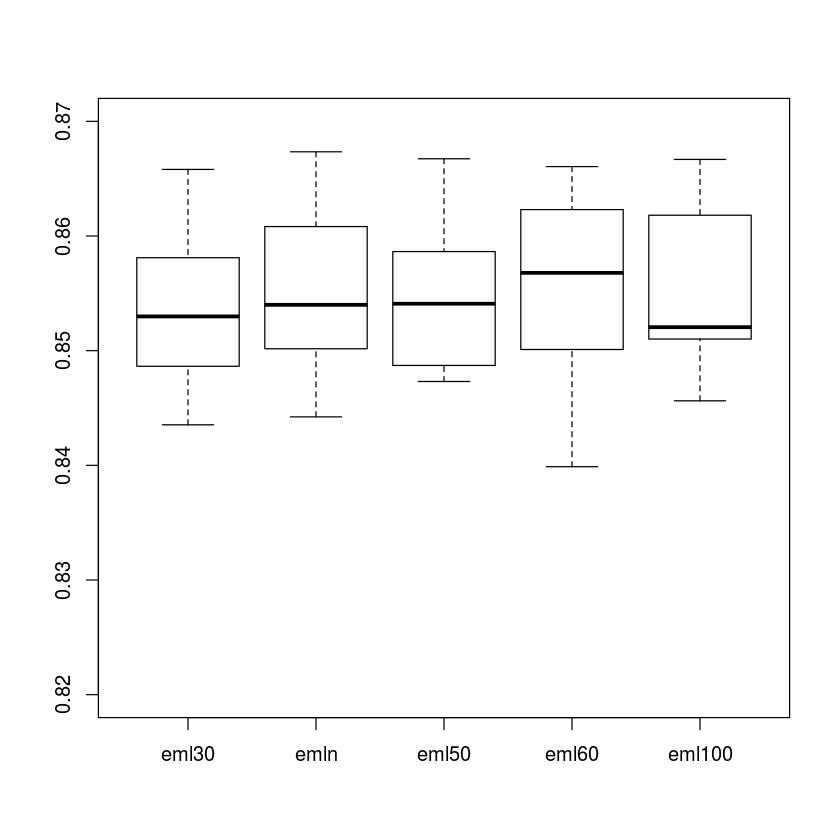

In [953]:
boxplot(sdf,ylim=c(0.82,0.87))

In [829]:
bxdataframe=data.frame(T=xg4scores$AUC,F=xg4nlscores$AUC,M=xg4mscores$AUC,L=xg4lscores$AUC, ML = xg4mlscores$AUC, EML = xg4emlscores$AUC, EML2 = xg4eml2scores$AUC, EML3 = xg4eml3scores$AUC)

In [831]:
sapply(bxdataframe,mean)

T         F         M         L        ML       EML      EML2      EML3 
0.8434688 0.8424256 0.8523682 0.8437850 0.8527754 0.8542972 0.8546109 0.8549477

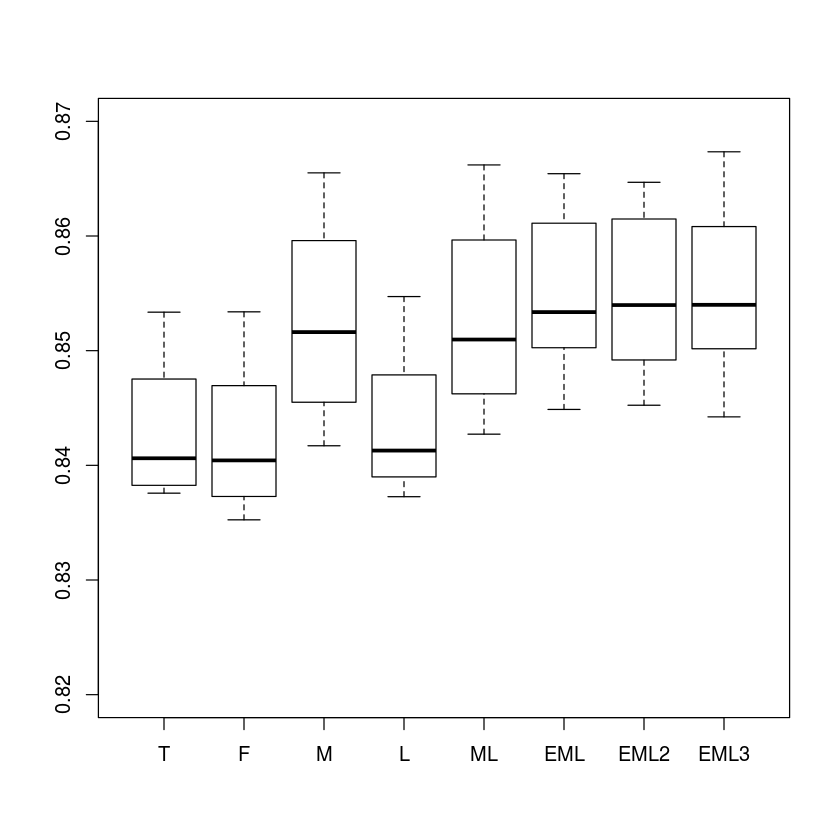

In [832]:
boxplot(bxdataframe,ylim=c(0.82,0.87))
abline(0.5,0,col="red")

In [833]:
bxdataframe2=data.frame(T=xg4scores$LIFT10,F=xg4nlscores$LIFT10,M=xg4mscores$LIFT10,L=xg4lscores$LIFT10, ML = xg4mlscores$LIFT10, EML = xg4emlscores$LIFT10, EML2 = xg4eml2scores$LIFT10, EML3 = xg4eml3scores$LIFT10)

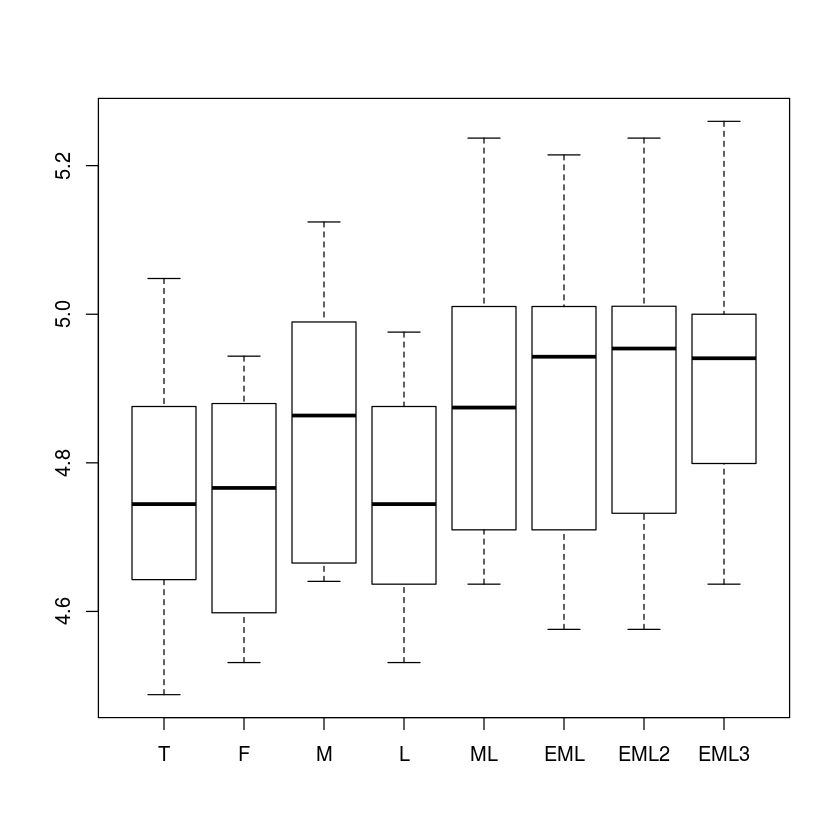

In [834]:
boxplot(bxdataframe2)

# Wyznaczenie scoringów

In [449]:
#polecam zamienic plik Student testowy na csv-kę

In [835]:
test = read.csv("Student-testowy.csv",header=TRUE)

### Wybieranie predyktorów zgodnie z train4

In [836]:
dim(train4)

[1] 93646    61

In [837]:
dim(test)

[1] 32967   117

In [838]:
indices_to_keep = unlist(sapply(colnames(train4),function(tt){which(colnames(test)==tt)}))

In [839]:
test2 = test[,indices_to_keep]

In [840]:
dim(test2)

[1] 32967    60

In [456]:
#zatem mamy wszystkie predyktory oprócz etykiety (której oczywiście nie ma)

### Konwersje kolumn, dodanie NA

In [841]:
a = data.frame(c(sapply(test2,class),'None'),sapply(train4,class))

In [842]:
a

,c.sapply.test2..class....None..,sapply.train4..class.
LastCall__c,factor,numeric
etx_make_name,factor,factor
etx_model_name,factor,factor
etx_fuel_code,integer,factor
production_year,integer,numeric
protection_scope,integer,factor
kind,factor,factor
use_frequency,factor,factor
child_carriage_frequency,integer,factor
mileage,integer,numeric


In [843]:
test2$etx_fuel_code = as.factor(test2$etx_fuel_code)

test2$production_year = as.numeric(test2$production_year)

test2$protection_scope = as.factor(test2$protection_scope)

test2$child_carriage_frequency = as.factor(test2$child_carriage_frequency)

test2$mileage = as.numeric(test2$mileage)
test2$yearly_mileage = as.numeric(test2$yearly_mileage)
test2$used_abroad = as.numeric(test2$used_abroad)


test2$theft_protection_installation = as.factor(test2$theft_protection_installation)
test2$theft_protection_device_1 = as.factor(test2$theft_protection_device_1)
test2$theft_protection_device_2 = as.factor(test2$theft_protection_device_2)

test2$buy_year = as.numeric(test2$buy_year)
test2$car_worth = as.numeric(test2$car_worth)
test2$main_driver_age = as.numeric(test2$main_driver_age)
test2$step = as.numeric(test2$step)
test2$oc_offer_min_val = as.numeric(test2$oc_offer_min_val)
test2$ac_offers_qty = as.numeric(test2$ac_offers_qty)
test2$b2c_leads_sent = as.numeric(test2$b2c_leads_sent)
test2$offer_first_after = as.numeric(test2$offer_first_after)
test2$offer_last_after = as.numeric(test2$offer_last_after)
test2$phone_lookup_status = as.numeric(test2$phone_lookup_status)
test2$went_to_partners = as.numeric(test2$went_to_partners)
test2$Account__r.AgreementMarketing__pc = as.integer(test2$Account__r.AgreementMarketing__pc)
test2$CarEngineCapacity__c = as.numeric(test2$CarEngineCapacity__c)
test2$CarYear__c = as.numeric(test2$CarYear__c)
test2$WentToPartner__c = as.integer(test2$WentToPartner__c)
test2$dont_have_this_car__c = as.integer(test2$dont_have_this_car__c)


#kody pocztowe
test2$night_parking_place_postal_code = postalCodeToRegion (test2$night_parking_place_postal_code)
test2$day_parking_place_postal_code = postalCodeToRegion (test2$day_parking_place_postal_code)
test2$main_driver_postal_code = postalCodeToRegion (test2$main_driver_postal_code)
test2$Account__r.BillingPostalCode = postalCodeToRegion (test2$Account__r.BillingPostalCode)

Zamiana "" na NA dla factorow

In [844]:
factors = which(sapply(test2,class)=='factor')
for (i in factors){
    test2[,i] = sapply(as.character(test2[,i]),function(x){if(is.na(x) | x==''){NA}else{x}})
    test2[,i] = as.factor(test2[,i])
}

Dodanie NA do factorów

In [845]:
for (cc in 1:ncol(test2)){
    if (is.factor(test2[,cc]) & any(is.na(test2[,cc]))){
        test2[,cc] = addNA(test2[,cc])
    }
}

Zamiana dat na typ zgodny z obecnym w zbiorze treningowym

In [846]:
head(test2$registration_date)
head(test2$offer_last_at)
head(test2$Account__r.PersonBirthdate)
head(test2$PolicyStartDate__c)
head(test2$LastCall__c)

[1] 15-Jul-05 0:00:00 15-May-15 0:00:00 15-Nov-98 0:00:00 15-Jul-17 0:00:00
[5] 15-Apr-97 0:00:00 15-May-13 0:00:00
355 Levels: 15-Apr-00 0:00:00 15-Apr-01 0:00:00 ... 4-Mar-09 0:00:00

[1] 1-Aug-17 0:31:01 1-Aug-17 0:31:36 1-Aug-17 0:41:27 1-Aug-17 0:50:04
[5] 1-Aug-17 1:19:49 1-Aug-17 1:23:55
20966 Levels: 10-Aug-17 0:03:20 10-Aug-17 0:04:51 ... <NA>

[1] 11-Jan-1948 9-Dec-1966  24-Jul-1975 12-Jan-1991 26-Apr-1999 10-May-1985
14075 Levels: 10-Apr-1938 10-Apr-1948 10-Apr-1952 10-Apr-1953 ... <NA>

[1] 9-Aug-2017  7-Aug-2017  29-Oct-2017 1-Sep-2017  18-Aug-2017 4-Aug-2017 
218 Levels: 10-Aug-2017 10-Dec-2017 10-Feb-2018 10-Jan-2018 ... <NA>

[1] 1-Aug-17 11:26:08 2-Aug-17 14:04:58 <NA>              <NA>             
[5] <NA>              <NA>             
6239 Levels: 10-Aug-17 10:08:10 10-Aug-17 10:09:07 ... <NA>

In [847]:
d0 <- as.Date(0, origin="1899-12-30", tz='UTC')

In [848]:
test2$LastCall__c = sapply(as.character(test2$LastCall__c), function(rd){
    if (is.na(rd) | nchar(rd)<5) {NA} else {
    ssplit = strsplit(rd,' ')[[1]]
    a = strsplit(ssplit[1],'-')[[1]]
    aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%y')
    numericdate = as.numeric(aa-d0)
    b = strsplit(ssplit[2],':')[[1]]
    dayseconds = 24*60*60
    numerator = as.numeric(b[1])*3600+as.numeric(b[2])*60+as.numeric(b[3])
    numericdate + (numerator/dayseconds)
    }
})

In [849]:
test2$registration_date = sapply(as.character(test2$registration_date), function(rd){
    if (nchar(rd)<5) {NA} else {
    a = strsplit(strsplit(rd,' ')[[1]],'-')[[1]]
    aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%y')
    as.numeric(aa-d0)
    }
})

In [850]:
test2$offer_last_at = sapply(as.character(test2$offer_last_at), function(rd){
    if (is.na(rd) | nchar(rd)<5) {NA} else {
    ssplit = strsplit(rd,' ')[[1]]
    a = strsplit(ssplit[1],'-')[[1]]
    aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%y')
    numericdate = as.numeric(aa-d0)
    b = strsplit(ssplit[2],':')[[1]]
    dayseconds = 24*60*60
    numerator = as.numeric(b[1])*3600+as.numeric(b[2])*60+as.numeric(b[3])
    numericdate + (numerator/dayseconds)
    }
})

In [851]:
test2$Account__r.PersonBirthdate = sapply(as.character(test2$Account__r.PersonBirthdate), function(rd){
    if (is.na(rd) | nchar(rd)<5) {NA} else {
        a = strsplit(strsplit(rd,' ')[[1]],'-')[[1]]
        aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%Y')
        as.numeric(aa-d0)
    }
})

In [852]:
test2$PolicyStartDate__c = sapply(as.character(test2$PolicyStartDate__c), function(rd){
    if (is.na(rd) | nchar(rd)<5) {NA} else {
        a = strsplit(strsplit(rd,' ')[[1]],'-')[[1]]
        aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%Y')
        as.numeric(aa-d0)
    }
})

Dwa predyktory odrzucone w zbiorze testowym na razie, które służą do wyznaczenia predyktora formFillingTime

In [855]:
head(test$created_at)

[1] 1-Aug-17 0:11:00 1-Aug-17 0:19:31 1-Aug-17 0:34:32 1-Aug-17 0:44:10
[5] 1-Aug-17 1:08:04 1-Aug-17 1:16:42
32642 Levels: 10-Aug-17 0:08:03 10-Aug-17 0:11:52 ... 9-Aug-17 9:59:33

In [856]:
ADD_THIS_created_at = sapply(as.character(test$created_at), function(rd){
    if (is.na(rd) | nchar(rd)<5) {NA} else {
    ssplit = strsplit(rd,' ')[[1]]
    a = strsplit(ssplit[1],'-')[[1]]
    aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%y')
    numericdate = as.numeric(aa-d0)
    b = strsplit(ssplit[2],':')[[1]]
    dayseconds = 24*60*60
    numerator = as.numeric(b[1])*3600+as.numeric(b[2])*60+as.numeric(b[3])
    numericdate + (numerator/dayseconds)
    }
})

In [857]:
head(ADD_THIS_created_at)

1-Aug-17 0:11:00 1-Aug-17 0:19:31 1-Aug-17 0:34:32 1-Aug-17 0:44:10 
        42948.01         42948.01         42948.02         42948.03 
1-Aug-17 1:08:04 1-Aug-17 1:16:42 
        42948.05         42948.05

In [858]:
any(is.na(ADD_THIS_created_at))

[1] FALSE

In [859]:
ADD_THIS_form_finished_at = sapply(as.character(test$form_finished_at), function(rd){
    if (is.na(rd) | nchar(rd)<5) {NA} else {
    ssplit = strsplit(rd,' ')[[1]]
    a = strsplit(ssplit[1],'-')[[1]]
    aa = as.Date(paste0(which(month.abb==a[2]),'/',a[1],'/',a[3]),'%m/%d/%y')
    numericdate = as.numeric(aa-d0)
    b = strsplit(ssplit[2],':')[[1]]
    dayseconds = 24*60*60
    numerator = as.numeric(b[1])*3600+as.numeric(b[2])*60+as.numeric(b[3])
    numericdate + (numerator/dayseconds)
    }
})

In [860]:
head(ADD_THIS_form_finished_at)

1-Aug-17 0:30:20 1-Aug-17 0:31:10 1-Aug-17 0:41:12 1-Aug-17 0:49:34 
        42948.02         42948.02         42948.03         42948.03 
1-Aug-17 1:20:19 1-Aug-17 1:23:44 
        42948.06         42948.06

In [861]:
any(is.na(ADD_THIS_form_finished_at))

[1] TRUE

In [862]:
mean(is.na(ADD_THIS_form_finished_at))

[1] 0.0004853338

In [863]:
ADD_THIS_form_finished_at[is.na(ADD_THIS_form_finished_at)] = mean(ADD_THIS_form_finished_at[!is.na(ADD_THIS_form_finished_at)])

In [864]:
any(is.na(ADD_THIS_form_finished_at))

[1] FALSE

### Imputacja zbioru testowego

In [865]:
#wszystkie atrybuty numeryczne i integery (factory są już obsłużone przez NA)
test_numerics = which(sapply(test2,class)%in%c('numeric','integer'))
#wszystkie z NA
t = test_numerics[which(sapply(test2[,test_numerics],function(x)any(is.na(x))))]

In [866]:
colnames(test2)[t]

[1] "LastCall__c"                "mileage"                   
 [3] "car_worth"                  "ac_offers_qty"             
 [5] "b2c_leads_sent"             "offer_last_at"             
 [7] "Account__r.PersonBirthdate" "CarEngineCapacity__c"      
 [9] "CarYear__c"                 "PolicyStartDate__c"

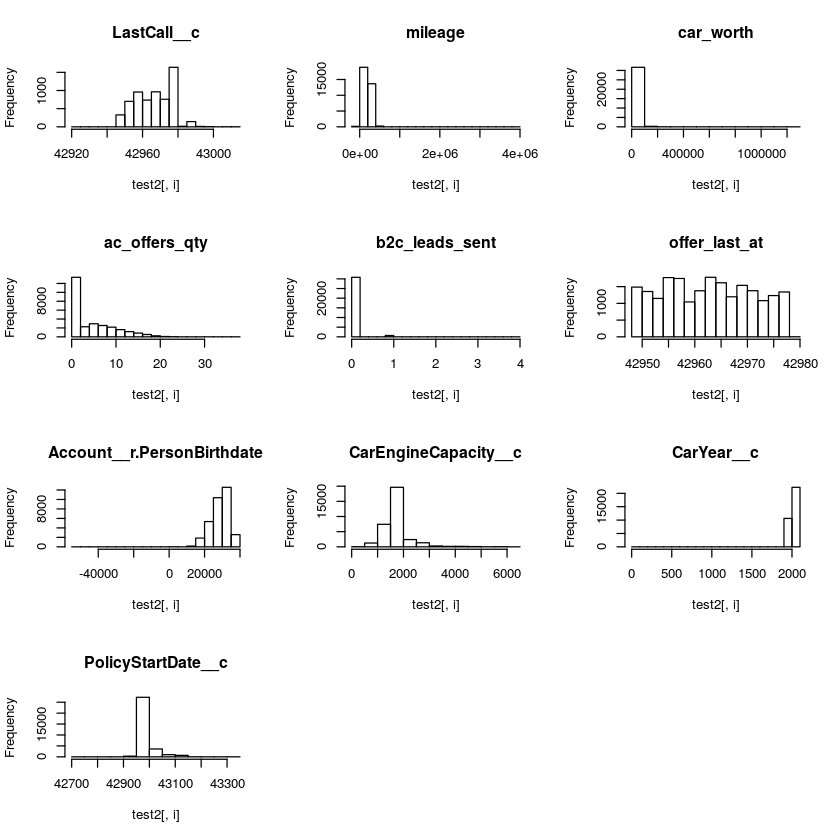

In [867]:
#troche mniej NA w numerycznych predyktorach. pokażę teraz histogramy dla zmiennych, tak dla jaj
par(mfrow=c(4,3))
for (i in t){
    hist(test2[,i],main=colnames(test2)[i])
}

In [868]:
# znowu używam średniej do imputacji wartości. niezbyt mądre, ale cholernie szybkie
for (i in t){
    missing = which(is.na(test2[,i]))
    test2[missing,i] = as.integer(mean(test2[-missing,i]))
}

In [869]:
any(sapply(test2,function(t2)any(is.na(t2))))

[1] FALSE

### Nowe predyktory (wg zbioru train4eml)

In [870]:
colnames(test2)==head(colnames(train4),-1)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [871]:
colnames(train4eml)

[1] "LastCall__c"                       "etx_make_name"                    
 [3] "etx_model_name"                    "etx_fuel_code"                    
 [5] "production_year"                   "protection_scope"                 
 [7] "kind"                              "use_frequency"                    
 [9] "child_carriage_frequency"          "mileage"                          
[11] "yearly_mileage"                    "used_abroad"                      
[13] "night_parking_place"               "night_parking_place_postal_code"  
[15] "day_parking_place"                 "day_parking_place_postal_code"    
[17] "theft_protection_installation"     "theft_protection_device_1"        
[19] "theft_protection_device_2"         "origin"                           
[21] "buy_year"                          "registration_date"                
[23] "car_worth"                         "main_driver_postal_code"          
[25] "main_driver_age"                   "main_driver_gender"               
[27] "phone_exists"                      "step"                             
[29] "oc_offer_min_val"                  "ac_offers_qty"                    
[31] "b2c_leads_sent"                    "offer_last_at"                    
[33] "offer_first_after"                 "offer_last_after"                 
[35] "phone_lookup_status"               "utm_campaign"                     
[37] "utm_content"                       "utm_medium"                       
[39] "utm_source"                        "went_to_partners"                 
[41] "Acc_PhoneHLRStatus__c"             "Account__r.AccountSource"         
[43] "Account__r.AgreementMarketing__pc" "Account__r.BillingCity"           
[45] "Account__r.BillingPostalCode"      "Account__r.Gender__pc"            
[47] "Account__r.PersonBirthdate"        "Account__r.PhoneHLRStatus__pc"    
[49] "Account__r.PhoneNATStatus__pc"     "Account__r.Salutation"            
[51] "CarEngineCapacity__c"              "CarFuelType__c"                   
[53] "CarYear__c"                        "Mpc__c"                           
[55] "PolicyStartDate__c"                "ProductScope__c"                  
[57] "Source__c"                         "WentToPartner__c"                 
[59] "dont_have_this_car__c"             "TelehubStatus__c"                 
[61] "Sale.success"                      "contactDifference"                
[63] "timeWaiting"                       "hurryTime"                        
[65] "formFillingTime"                   "is_damaged"                       
[67] "ac_offer_min_val"                  "oc_offers_qty"                    
[69] "ocacqty"                           "ocacminval"                       
[71] "ocacratio"

In [872]:
test2m = test2
test2m$contactDifference = (test2m$LastCall__c)-(ADD_THIS_form_finished_at)

In [873]:
any(is.na(test2m$contactDifference))

[1] FALSE

In [874]:
test2m$timeWaiting = (test2m$offer_last_after)-(test2m$offer_first_after)

In [876]:
any(is.na(test2m$timeWaiting))

[1] FALSE

In [877]:
test2m$hurryTime = (test2m$PolicyStartDate__c)-(ADD_THIS_created_at)

In [879]:
any(is.na(test2m$hurryTime))

[1] FALSE

In [488]:
#czas wypelniania ankiety

In [880]:
formFillingTimet = (ADD_THIS_form_finished_at)-(ADD_THIS_created_at)
test2m$formFillingTime = formFillingTimet

In [881]:
any(is.na(test2m$formFillingTime))

[1] FALSE

In [490]:
#imputacja
#test2m$formFillingTime[is.na(formFillingTimet)] = mean(test2m$formFillingTime[!is.na(formFillingTimet)])

### Obniżone levele factorow - tylko te factory, które coś wniosą do modelu

In [882]:
sapply(test2m,function(l)length(levels(l)))

LastCall__c                     etx_make_name 
                                0                                63 
                   etx_model_name                     etx_fuel_code 
                              637                                 6 
                  production_year                  protection_scope 
                                0                                 2 
                             kind                     use_frequency 
                                2                                 2 
         child_carriage_frequency                           mileage 
                                3                                 0 
                   yearly_mileage                       used_abroad 
                                0                                 0 
              night_parking_place   night_parking_place_postal_code 
                                7                                31 
                day_parking_place     day_parking_place_postal_code 
                                7                                30 
    theft_protection_installation         theft_protection_device_1 
                                5                                 4 
        theft_protection_device_2                            origin 
                                5                                 5 
                         buy_year                 registration_date 
                                0                                 0 
                        car_worth           main_driver_postal_code 
                                0                                31 
                  main_driver_age                main_driver_gender 
                                0                                 3 
                     phone_exists                              step 
                                2                                 0 
                 oc_offer_min_val                     ac_offers_qty 
                                0                                 0 
                   b2c_leads_sent                     offer_last_at 
                                0                                 0 
                offer_first_after                  offer_last_after 
                                0                                 0 
              phone_lookup_status                      utm_campaign 
                                0                               111 
                      utm_content                        utm_medium 
                              285                                32 
                       utm_source                  went_to_partners 
                               75                                 0 
            Acc_PhoneHLRStatus__c          Account__r.AccountSource 
                                5                                18 
Account__r.AgreementMarketing__pc            Account__r.BillingCity 
                                0                              5971 
     Account__r.BillingPostalCode             Account__r.Gender__pc 
                               31                                 3 
       Account__r.PersonBirthdate     Account__r.PhoneHLRStatus__pc 
                                0                                 5 
    Account__r.PhoneNATStatus__pc             Account__r.Salutation 
                                5                                 4 
             CarEngineCapacity__c                    CarFuelType__c 
                                0                                 6 
                       CarYear__c                            Mpc__c 
                                0                                18 
               PolicyStartDate__c                   ProductScope__c 
                                0                                 4 
                        Source__c                  WentToPartner__c 
                               14                                 0 
            dont_hav

In [492]:
#upraszczanie factorów Mpc__c

In [883]:
test2m$Mpc__c = as.factor(tolower(test2m$Mpc__c))
test2m$Mpc__c = addNA(test2m$Mpc__c)

In [884]:
utm_campaign = sapply(test2m$utm_campaign, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('mailing',u,ignore.case=T)>0) {"mailing"} else if 
        (regexpr('kalkulator',u,ignore.case=T)>0){"kalkulator"} else if 
        (regexpr('baner',u,ignore.case=T)>0){"baner"}  else if 
        (regexpr('sprzedany',u,ignore.case=T)>0){"sprzedany"} else
            {u}
})

utm_campaign = as.factor(utm_campaign)
utm_campaign = addNA(utm_campaign)
test2m$utm_campaign = utm_campaign

In [885]:
utm_content = sapply(test2m$utm_content, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('OC',u,ignore.case=T)>0) {"OC"} else if 
        (regexpr('button',u,ignore.case=T)>0){"button"} else
            {u}
})

utm_content = as.factor(utm_content)
utm_content = addNA(utm_content)
test2m$utm_content = utm_content

In [886]:
utm_medium = sapply(test2m$utm_medium, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('baner',u,ignore.case=T)>0) {"baner"} else if 
        (regexpr('banner',u,ignore.case=T)>0){"baner"} else if 
        (regexpr('link',u,ignore.case=T)>0){"link"} else
            {u}
})

utm_medium = as.factor(utm_medium)
utm_medium = addNA(utm_medium)
test2m$utm_medium = utm_medium

In [887]:
salutation = sapply(test2m$Account__r.Salutation, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('ms.',u,ignore.case=T)==1) {"pani"} else if 
        (regexpr('mr.',u,ignore.case=T)==1){"pan"} else if 
        (regexpr('brak',u,ignore.case=T)==1){NA} else
            {u}
})

salutation = as.factor(salutation)
salutation = addNA(salutation)
test2m$Account__r.Salutation = salutation

In [888]:
utm_source = sapply(test2m$utm_source, function(u){
    u = tolower(as.character(u))
    if (is.na(u)){NA}else if 
        (regexpr('forum',u,ignore.case=T)>0) {"forum"} else if 
        (regexpr('cc',u,ignore.case=T)>0){"cc"}  else
            {u}
})

utm_source = as.factor(utm_source)
utm_source = addNA(utm_source)
test2m$utm_source = utm_source

### Dodanie is_damaged

In [889]:
test2m$is_damaged = as.factor(test$is_damaged)

### Dodanie kolumn OC/AC

In [890]:
test2m$oc_offer_min_val = test$oc_offer_min_val
test2m$oc_offer_min_val[is.na(test2m$oc_offer_min_val)] = 0

test2m$ac_offer_min_val = test$ac_offer_min_val
test2m$ac_offer_min_val[is.na(test2m$ac_offer_min_val)] = 0

test2m$oc_offers_qty = test$oc_offers_qty
test2m$oc_offers_qty[is.na(test2m$oc_offers_qty)] = 0

test2m$ac_offers_qty = test$ac_offers_qty
test2m$ac_offers_qty[is.na(test2m$ac_offers_qty)] = 0

test2m$ocacqty = test2m$oc_offers_qty + test2m$ac_offers_qty
test2m$ocacminval = test2m$oc_offer_min_val + test2m$ac_offer_min_val
test2m$ocacratio = (test2m$oc_offer_min_val) / (test2m$ac_offer_min_val)
test2m$ocacratio[test2m$ac_offer_min_val==0] = 0

In [891]:
any(is.na(test2m$oc_offer_min_val))
any(is.na(test2m$ac_offer_min_val))
any(is.na(test2m$oc_offers_qty))
any(is.na(test2m$ac_offers_qty))
any(is.na(test2m$ocacqty))
any(is.na(test2m$ocacminval))
any(is.na(test2m$ocacratio))

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

[1] FALSE

In [892]:
head(test2m$form_finished_at)
head(test2m$form_finished_at)
head(test2m$created_at)
head(test2m$offer_first_after)
head(test2m$offer_last_after)

NULL

NULL

NULL

[1] 17  7  9 13  0 10

[1] 41 26 15 30  0 11

In [893]:
any(is.na(ADD_THIS_form_finished_at))
any(is.na(ADD_THIS_created_at))

[1] FALSE

[1] FALSE

In [907]:
#DO EML2-EML3
test2m$lastcallDOW = as.factor((as.integer(test2m$LastCall__c) + 6)%%7)
test2m$LastCall__c = NULL
test2m$offer_last_at = NULL
test2m$created_atDOW = as.factor((as.integer(ADD_THIS_created_at) + 6)%%7)

In [908]:
any(sapply(test2m,function(t)any(is.na(t))))
any(sapply(train4eml3,function(t)any(is.na(t))))

[1] FALSE

[1] FALSE

In [909]:
dim(test2m)
dim(test2)

[1] 32967    70

[1] 32967    60

In [910]:
mdtest2m = sparse.model.matrix(~.,test2m)

In [911]:
dim(mdtest2m)

[1] 32967  7145

In [912]:
colnames(train4eml3)

[1] "etx_make_name"                     "etx_model_name"                   
 [3] "etx_fuel_code"                     "production_year"                  
 [5] "protection_scope"                  "kind"                             
 [7] "use_frequency"                     "child_carriage_frequency"         
 [9] "mileage"                           "yearly_mileage"                   
[11] "used_abroad"                       "night_parking_place"              
[13] "night_parking_place_postal_code"   "day_parking_place"                
[15] "day_parking_place_postal_code"     "theft_protection_installation"    
[17] "theft_protection_device_1"         "theft_protection_device_2"        
[19] "origin"                            "buy_year"                         
[21] "registration_date"                 "car_worth"                        
[23] "main_driver_postal_code"           "main_driver_age"                  
[25] "main_driver_gender"                "phone_exists"                     
[27] "step"                              "oc_offer_min_val"                 
[29] "ac_offers_qty"                     "b2c_leads_sent"                   
[31] "offer_first_after"                 "offer_last_after"                 
[33] "phone_lookup_status"               "utm_campaign"                     
[35] "utm_content"                       "utm_medium"                       
[37] "utm_source"                        "went_to_partners"                 
[39] "Acc_PhoneHLRStatus__c"             "Account__r.AccountSource"         
[41] "Account__r.AgreementMarketing__pc" "Account__r.BillingCity"           
[43] "Account__r.BillingPostalCode"      "Account__r.Gender__pc"            
[45] "Account__r.PersonBirthdate"        "Account__r.PhoneHLRStatus__pc"    
[47] "Account__r.PhoneNATStatus__pc"     "Account__r.Salutation"            
[49] "CarEngineCapacity__c"              "CarFuelType__c"                   
[51] "CarYear__c"                        "Mpc__c"                           
[53] "PolicyStartDate__c"                "ProductScope__c"                  
[55] "Source__c"                         "WentToPartner__c"                 
[57] "dont_have_this_car__c"             "TelehubStatus__c"                 
[59] "Sale.success"                      "contactDifference"                
[61] "timeWaiting"                       "hurryTime"                        
[63] "formFillingTime"                   "is_damaged"                       
[65] "ac_offer_min_val"                  "oc_offers_qty"                    
[67] "ocacqty"                           "ocacminval"                       
[69] "ocacratio"                         "lastcallDOW"                      
[71] "created_atDOW"

In [913]:
colnames(test2m)

[1] "etx_make_name"                     "etx_model_name"                   
 [3] "etx_fuel_code"                     "production_year"                  
 [5] "protection_scope"                  "kind"                             
 [7] "use_frequency"                     "child_carriage_frequency"         
 [9] "mileage"                           "yearly_mileage"                   
[11] "used_abroad"                       "night_parking_place"              
[13] "night_parking_place_postal_code"   "day_parking_place"                
[15] "day_parking_place_postal_code"     "theft_protection_installation"    
[17] "theft_protection_device_1"         "theft_protection_device_2"        
[19] "origin"                            "buy_year"                         
[21] "registration_date"                 "car_worth"                        
[23] "main_driver_postal_code"           "main_driver_age"                  
[25] "main_driver_gender"                "phone_exists"                     
[27] "step"                              "oc_offer_min_val"                 
[29] "ac_offers_qty"                     "b2c_leads_sent"                   
[31] "offer_first_after"                 "offer_last_after"                 
[33] "phone_lookup_status"               "utm_campaign"                     
[35] "utm_content"                       "utm_medium"                       
[37] "utm_source"                        "went_to_partners"                 
[39] "Acc_PhoneHLRStatus__c"             "Account__r.AccountSource"         
[41] "Account__r.AgreementMarketing__pc" "Account__r.BillingCity"           
[43] "Account__r.BillingPostalCode"      "Account__r.Gender__pc"            
[45] "Account__r.PersonBirthdate"        "Account__r.PhoneHLRStatus__pc"    
[47] "Account__r.PhoneNATStatus__pc"     "Account__r.Salutation"            
[49] "CarEngineCapacity__c"              "CarFuelType__c"                   
[51] "CarYear__c"                        "Mpc__c"                           
[53] "PolicyStartDate__c"                "ProductScope__c"                  
[55] "Source__c"                         "WentToPartner__c"                 
[57] "dont_have_this_car__c"             "TelehubStatus__c"                 
[59] "contactDifference"                 "timeWaiting"                      
[61] "hurryTime"                         "formFillingTime"                  
[63] "is_damaged"                        "ac_offer_min_val"                 
[65] "oc_offers_qty"                     "ocacqty"                          
[67] "ocacminval"                        "ocacratio"                        
[69] "lastcallDOW"                       "created_atDOW"

In [916]:
#sprawdzanie równoważności kolejności zmiennych w zbiorze treningowym i testowym
#nie kontynuować, jeżeli tu będzie false!
all((colnames(train4eml3)[-which(colnames(train4eml3)=='Sale.success')])==(colnames(test2m)))
all(sapply(train4eml3[,-which(colnames(train4eml3)=='Sale.success')],class) == sapply(test2m,class))

[1] TRUE

[1] TRUE

In [917]:
colnames(train4eml3)[-which(colnames(train4eml3)=='Sale.success')]

[1] "etx_make_name"                     "etx_model_name"                   
 [3] "etx_fuel_code"                     "production_year"                  
 [5] "protection_scope"                  "kind"                             
 [7] "use_frequency"                     "child_carriage_frequency"         
 [9] "mileage"                           "yearly_mileage"                   
[11] "used_abroad"                       "night_parking_place"              
[13] "night_parking_place_postal_code"   "day_parking_place"                
[15] "day_parking_place_postal_code"     "theft_protection_installation"    
[17] "theft_protection_device_1"         "theft_protection_device_2"        
[19] "origin"                            "buy_year"                         
[21] "registration_date"                 "car_worth"                        
[23] "main_driver_postal_code"           "main_driver_age"                  
[25] "main_driver_gender"                "phone_exists"                     
[27] "step"                              "oc_offer_min_val"                 
[29] "ac_offers_qty"                     "b2c_leads_sent"                   
[31] "offer_first_after"                 "offer_last_after"                 
[33] "phone_lookup_status"               "utm_campaign"                     
[35] "utm_content"                       "utm_medium"                       
[37] "utm_source"                        "went_to_partners"                 
[39] "Acc_PhoneHLRStatus__c"             "Account__r.AccountSource"         
[41] "Account__r.AgreementMarketing__pc" "Account__r.BillingCity"           
[43] "Account__r.BillingPostalCode"      "Account__r.Gender__pc"            
[45] "Account__r.PersonBirthdate"        "Account__r.PhoneHLRStatus__pc"    
[47] "Account__r.PhoneNATStatus__pc"     "Account__r.Salutation"            
[49] "CarEngineCapacity__c"              "CarFuelType__c"                   
[51] "CarYear__c"                        "Mpc__c"                           
[53] "PolicyStartDate__c"                "ProductScope__c"                  
[55] "Source__c"                         "WentToPartner__c"                 
[57] "dont_have_this_car__c"             "TelehubStatus__c"                 
[59] "contactDifference"                 "timeWaiting"                      
[61] "hurryTime"                         "formFillingTime"                  
[63] "is_damaged"                        "ac_offer_min_val"                 
[65] "oc_offers_qty"                     "ocacqty"                          
[67] "ocacminval"                        "ocacratio"                        
[69] "lastcallDOW"                       "created_atDOW"

In [918]:
colnames(test2m)

[1] "etx_make_name"                     "etx_model_name"                   
 [3] "etx_fuel_code"                     "production_year"                  
 [5] "protection_scope"                  "kind"                             
 [7] "use_frequency"                     "child_carriage_frequency"         
 [9] "mileage"                           "yearly_mileage"                   
[11] "used_abroad"                       "night_parking_place"              
[13] "night_parking_place_postal_code"   "day_parking_place"                
[15] "day_parking_place_postal_code"     "theft_protection_installation"    
[17] "theft_protection_device_1"         "theft_protection_device_2"        
[19] "origin"                            "buy_year"                         
[21] "registration_date"                 "car_worth"                        
[23] "main_driver_postal_code"           "main_driver_age"                  
[25] "main_driver_gender"                "phone_exists"                     
[27] "step"                              "oc_offer_min_val"                 
[29] "ac_offers_qty"                     "b2c_leads_sent"                   
[31] "offer_first_after"                 "offer_last_after"                 
[33] "phone_lookup_status"               "utm_campaign"                     
[35] "utm_content"                       "utm_medium"                       
[37] "utm_source"                        "went_to_partners"                 
[39] "Acc_PhoneHLRStatus__c"             "Account__r.AccountSource"         
[41] "Account__r.AgreementMarketing__pc" "Account__r.BillingCity"           
[43] "Account__r.BillingPostalCode"      "Account__r.Gender__pc"            
[45] "Account__r.PersonBirthdate"        "Account__r.PhoneHLRStatus__pc"    
[47] "Account__r.PhoneNATStatus__pc"     "Account__r.Salutation"            
[49] "CarEngineCapacity__c"              "CarFuelType__c"                   
[51] "CarYear__c"                        "Mpc__c"                           
[53] "PolicyStartDate__c"                "ProductScope__c"                  
[55] "Source__c"                         "WentToPartner__c"                 
[57] "dont_have_this_car__c"             "TelehubStatus__c"                 
[59] "contactDifference"                 "timeWaiting"                      
[61] "hurryTime"                         "formFillingTime"                  
[63] "is_damaged"                        "ac_offer_min_val"                 
[65] "oc_offers_qty"                     "ocacqty"                          
[67] "ocacminval"                        "ocacratio"                        
[69] "lastcallDOW"                       "created_atDOW"

In [974]:
#macierze rzadkie
mdtrain = sparse.model.matrix(Sale.success ~ ., train4eml3)
mdtest = sparse.model.matrix(~ .,test2m)
#dane testowe mają mniej leveli factorów
dim(mdtrain)
dim(mdtest)

[1] 93646  8482

[1] 32967  7145

## W tym miejscu gotowy zbiór treningowy jest w mdtrain, etykieta w trainy, zbiór testowy w mdtest
# Wyznaczanie scoringu i zapis do pliku:

In [954]:
#xgboost importance

trainxg = xgb.DMatrix(mdtrain,label=train4eml3$Sale.success)

xg=  xgboost(trainxg, nrounds=200, objective = "binary:logistic")

xgi = xgb.importance(colnames(mdtrain),xg)
xgselected = head(xgi$Feature,50)
xgcols = sapply(xgselected,function(xgs){which(colnames(mdtrain)==xgs)})

[1]	train-error:0.047573 
[2]	train-error:0.047712 
[3]	train-error:0.047690 
[4]	train-error:0.047797 
[5]	train-error:0.047840 
[6]	train-error:0.047797 
[7]	train-error:0.047669 
[8]	train-error:0.047541 
[9]	train-error:0.047509 
[10]	train-error:0.047381 
[11]	train-error:0.047274 
[12]	train-error:0.046985 
[13]	train-error:0.046783 
[14]	train-error:0.046622 
[15]	train-error:0.046441 
[16]	train-error:0.046217 
[17]	train-error:0.046014 
[18]	train-error:0.045779 
[19]	train-error:0.045683 
[20]	train-error:0.045480 
[21]	train-error:0.045277 
[22]	train-error:0.045181 
[23]	train-error:0.044914 
[24]	train-error:0.044551 
[25]	train-error:0.044359 
[26]	train-error:0.044230 
[27]	train-error:0.043857 
[28]	train-error:0.043835 
[29]	train-error:0.043761 
[30]	train-error:0.043600 
[31]	train-error:0.043611 
[32]	train-error:0.043472 
[33]	train-error:0.043387 
[34]	train-error:0.043120 
[35]	train-error:0.042832 
[36]	train-error:0.042821 
[37]	train-error:0.042714 
[38]	train

In [955]:
xgcols

went_to_partners 
                                    1150 
                         formFillingTime 
                                    8465 
                               hurryTime 
                                    8464 
                       contactDifference 
                                    8462 
                     phone_lookup_status 
                                     949 
                        oc_offer_min_val 
                                     944 
                           oc_offers_qty 
                                    8468 
                            lastcallDOW5 
                                    8475 
                      PolicyStartDate__c 
                                    8419 
                               car_worth 
                                     907 
                                 mileage 
                                     813 
                        offer_last_after 
                                     948 
                    CarEngineCapacity__c 
                                    8396 
                         main_driver_age 
                                     938 
                       registration_date 
                                     906 
                             timeWaiting 
                                    8463 
                        ac_offer_min_val 
                                    8467 
                              ocacminval 
                                    8470 
              Account__r.PersonBirthdate 
                                    8382 
                                 ocacqty 
                                    8469 
                               ocacratio 
                                    8471 
                            utm_sourcecc 
                                    1090 
                       offer_first_after 
                                     947 
                           ac_offers_qty 
                                     945 
                 Account__r.SalutationNA 
                                    8395 
                                buy_year 
                                     905 
                        WentToPartner__c 
                                    8440 
  TelehubStatus__csuccess_callmeback_kom 
                                    8456 
                      TelehubStatus__cNA 
                                    8461 
                              CarYear__c 
                                    8402 
                 phone_existsphone_exist 
                                     941 
                          yearly_mileage 
                                     814 
                         production_year 
                                     803 
                                Mpc__cNA 
                                    8418 
       Account__r.AgreementMarketing__pc 
                                    1176 
 TelehubStatus__csuccess_callmeback_inne 
                                    8455 
                       protection_scope2 
                                     804 
                Account__r.BillingCityNA 
                                    8349 
                          b2c_leads_sent 
                                     946 
Acc_PhoneHLRStatus__ckomórkowy(poprawny) 
                                    1151 
                       ProductScope__cOC 
                                    8420 
                                    step 
                                     943 
    night_parking_placeindividual_garage 
                                     818 
              theft_protection_device_22 
                                     897 
        TelehubStatus__cin_progress_day1 
                                    8451 
                          created_atDOW2 
                                    8478 
                       utm_contentbutton 
                                    1023 
                          created_atDOW5 
                                  

In [956]:
#sprawdzenie, czy te kolumny znajdują się w zbiorze testowym (z powodu innej liczby factorów, nie wiadomo):
in_test_features = sapply(names(xgcols),function(xc)any(colnames(mdtest)==xc))

In [957]:
in_test_features

went_to_partners 
                                    TRUE 
                         formFillingTime 
                                    TRUE 
                               hurryTime 
                                    TRUE 
                       contactDifference 
                                    TRUE 
                     phone_lookup_status 
                                    TRUE 
                        oc_offer_min_val 
                                    TRUE 
                           oc_offers_qty 
                                    TRUE 
                            lastcallDOW5 
                                    TRUE 
                      PolicyStartDate__c 
                                    TRUE 
                               car_worth 
                                    TRUE 
                                 mileage 
                                    TRUE 
                        offer_last_after 
                                    TRUE 
                    CarEngineCapacity__c 
                                    TRUE 
                         main_driver_age 
                                    TRUE 
                       registration_date 
                                    TRUE 
                             timeWaiting 
                                    TRUE 
                        ac_offer_min_val 
                                    TRUE 
                              ocacminval 
                                    TRUE 
              Account__r.PersonBirthdate 
                                    TRUE 
                                 ocacqty 
                                    TRUE 
                               ocacratio 
                                    TRUE 
                            utm_sourcecc 
                                    TRUE 
                       offer_first_after 
                                    TRUE 
                           ac_offers_qty 
                                    TRUE 
                 Account__r.SalutationNA 
                                    TRUE 
                                buy_year 
                                    TRUE 
                        WentToPartner__c 
                                    TRUE 
  TelehubStatus__csuccess_callmeback_kom 
                                    TRUE 
                      TelehubStatus__cNA 
                                    TRUE 
                              CarYear__c 
                                    TRUE 
                 phone_existsphone_exist 
                                    TRUE 
                          yearly_mileage 
                                    TRUE 
                         production_year 
                                    TRUE 
                                Mpc__cNA 
                                    TRUE 
       Account__r.AgreementMarketing__pc 
                                    TRUE 
 TelehubStatus__csuccess_callmeback_inne 
                                    TRUE 
                       protection_scope2 
                                    TRUE 
                Account__r.BillingCityNA 
                                    TRUE 
                          b2c_leads_sent 
                                    TRUE 
Acc_PhoneHLRStatus__ckomórkowy(poprawny) 
                                    TRUE 
                       ProductScope__cOC 
                                    TRUE 
                                    step 
                                    TRUE 
    night_parking_placeindividual_garage 
                                    TRUE 
              theft_protection_device_22 
                                    TRUE 
        TelehubStatus__cin_progress_day1 
                                    TRUE 
                          created_atDOW2 
                                    TRUE 
                       utm_contentbutton 
                                    TRUE 
                          created_atDOW5 
                                  

In [958]:
selected_features = names(xgcols)[in_test_features]

In [959]:
length(selected_features)

[1] 50

In [960]:
#kolumny wybrane do predykcji
selected_features

[1] "went_to_partners"                        
 [2] "formFillingTime"                         
 [3] "hurryTime"                               
 [4] "contactDifference"                       
 [5] "phone_lookup_status"                     
 [6] "oc_offer_min_val"                        
 [7] "oc_offers_qty"                           
 [8] "lastcallDOW5"                            
 [9] "PolicyStartDate__c"                      
[10] "car_worth"                               
[11] "mileage"                                 
[12] "offer_last_after"                        
[13] "CarEngineCapacity__c"                    
[14] "main_driver_age"                         
[15] "registration_date"                       
[16] "timeWaiting"                             
[17] "ac_offer_min_val"                        
[18] "ocacminval"                              
[19] "Account__r.PersonBirthdate"              
[20] "ocacqty"                                 
[21] "ocacratio"                               
[22] "utm_sourcecc"                            
[23] "offer_first_after"                       
[24] "ac_offers_qty"                           
[25] "Account__r.SalutationNA"                 
[26] "buy_year"                                
[27] "WentToPartner__c"                        
[28] "TelehubStatus__csuccess_callmeback_kom"  
[29] "TelehubStatus__cNA"                      
[30] "CarYear__c"                              
[31] "phone_existsphone_exist"                 
[32] "yearly_mileage"                          
[33] "production_year"                         
[34] "Mpc__cNA"                                
[35] "Account__r.AgreementMarketing__pc"       
[36] "TelehubStatus__csuccess_callmeback_inne" 
[37] "protection_scope2"                       
[38] "Account__r.BillingCityNA"                
[39] "b2c_leads_sent"                          
[40] "Acc_PhoneHLRStatus__ckomórkowy(poprawny)"
[41] "ProductScope__cOC"                       
[42] "step"                                    
[43] "night_parking_placeindividual_garage"    
[44] "theft_protection_device_22"              
[45] "TelehubStatus__cin_progress_day1"        
[46] "created_atDOW2"                          
[47] "utm_contentbutton"                       
[48] "created_atDOW5"                          
[49] "originbrought_earlier"                   
[50] "utm_sourceNA"

In [961]:
xgtrain = mdtrain[,selected_features]

In [968]:
dim(xgtrain)

[1] 93646    50

In [963]:
all(colnames(xgtrain)==selected_features)

[1] TRUE

In [964]:
#tuning dla wybranych predyktorów
sa = sample(1:nrow(xgtrain),40000,replace=F)
xgtrain2 = as.matrix(xgtrain[sa,])

In [965]:
xgFitControl = trainControl (method="cv",number = 4) #4fold
xgx = xgtrain2
xgy = as.factor(trainy[sa])
xgModel = train(xgx,xgy,
    method = "xgbTree",
    trControl = xgFitControl)

In [969]:
#tuning
besttune = xgModel$bestTune
besttune

,nrounds,max_depth,eta,gamma,colsample_bytree,min_child_weight,subsample
16,50,1,0.3,0,0.8,1,1


In [970]:
#trenowanie właściwego modelu
trainxg = xgb.DMatrix(xgtrain,label=trainy)

xg =  xgboost(params= xgModel$bestTune, data = trainxg, nrounds=50, objective = "binary:logistic")

[1]	train-error:0.048534 
[2]	train-error:0.048534 
[3]	train-error:0.048534 
[4]	train-error:0.048534 
[5]	train-error:0.048534 
[6]	train-error:0.048534 
[7]	train-error:0.048534 
[8]	train-error:0.048534 
[9]	train-error:0.048534 
[10]	train-error:0.048534 
[11]	train-error:0.048534 
[12]	train-error:0.048534 
[13]	train-error:0.048534 
[14]	train-error:0.048534 
[15]	train-error:0.048534 
[16]	train-error:0.048534 
[17]	train-error:0.048534 
[18]	train-error:0.048534 
[19]	train-error:0.048534 
[20]	train-error:0.048534 
[21]	train-error:0.048534 
[22]	train-error:0.048534 
[23]	train-error:0.048534 
[24]	train-error:0.048523 
[25]	train-error:0.048512 
[26]	train-error:0.048512 
[27]	train-error:0.048512 
[28]	train-error:0.048512 
[29]	train-error:0.048512 
[30]	train-error:0.048502 
[31]	train-error:0.048491 
[32]	train-error:0.048502 
[33]	train-error:0.048534 
[34]	train-error:0.048523 
[35]	train-error:0.048448 
[36]	train-error:0.048438 
[37]	train-error:0.048438 
[38]	train

In [975]:
#predykcja na zbiorze testowym
#w tym miejscu sprawdzam czy indeksy w rzadkich macierzach zbioru testowego i treningowego dokładnie się zgadzają
colnames(mdtrain[,selected_features])==colnames(mdtest[,selected_features])

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[46] TRUE TRUE TRUE TRUE TRUE

In [368]:
#jeśli wszędzie wyżej jest true, można wybrać zbiór testowy i puścić predykcję

In [976]:
xgtest = mdtest[,selected_features]

In [977]:
dim(xgtest)

[1] 32967    50

In [978]:
pred_test = predict(xg,xgtest,type="response")

In [986]:
length(pred_previous)==length(pred_test)

[1] TRUE

In [996]:
write.table(pred_test,"ABH-pred2.csv",col.names=F,row.names=F)

In [577]:
pred_previous = read.table("ABH-pred1.csv",header=F)

In [581]:
pred_previous = pred_previous$V1

In [583]:
mean(pred_previous)

[1] 0.02880429

In [997]:
cor(pred_previous,pred_test)

[1] 0.8560673

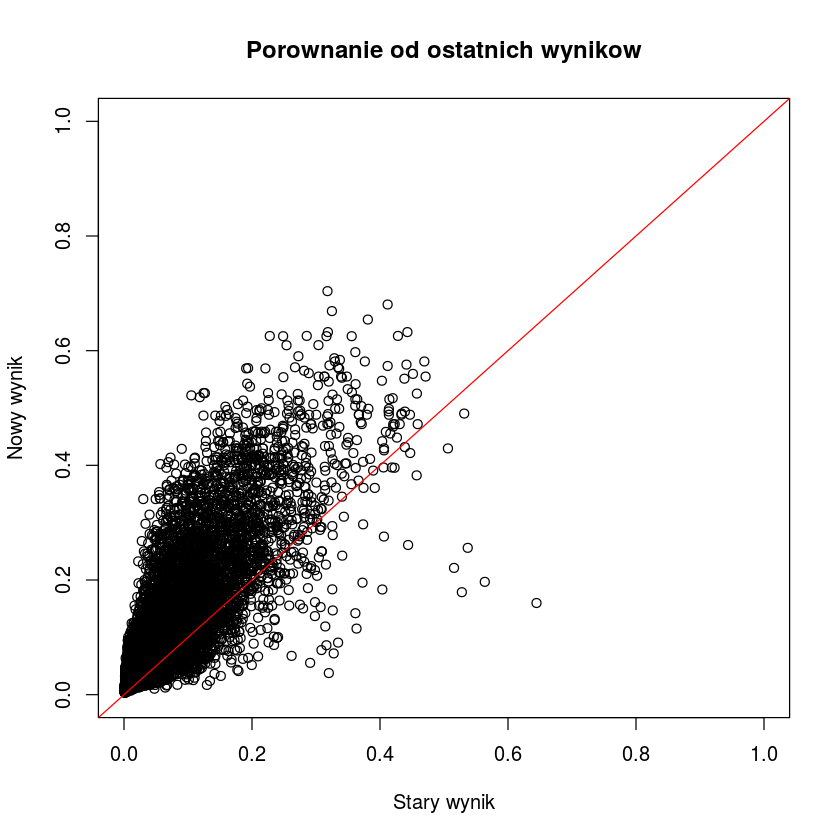

In [981]:
plot(pred_previous,pred_test,main="Porownanie od ostatnich wynikow",xlim=c(0,1),ylim=c(0,1),ylab="Nowy wynik",xlab="Stary wynik")
abline(0,1,col="red")